In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra
from statistics import mean, stdev

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5.npz")['x'] 
Output_train_5 = np.load("Deep_train_5.npz")['y']

Deep_test_5   = np.load("Deep_test_5.npz")['x'] 
Output_test_5 = np.load("Deep_test_5.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15.npz")['x'] 
Output_train_15 = np.load("Deep_train_15.npz")['y']

Deep_test_15   = np.load("Deep_test_15.npz")['x'] 
Output_test_15 = np.load("Deep_test_15.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30.npz")['x'] 
Output_train_30 = np.load("Deep_train_30.npz")['y']

Deep_test_30   = np.load("Deep_test_30.npz")['x'] 
Output_test_30 = np.load("Deep_test_30.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60.npz")['x'] 
Output_train_60 = np.load("Deep_train_60.npz")['y']

Deep_test_60   = np.load("Deep_test_60.npz")['x'] 
Output_test_60 = np.load("Deep_test_60.npz")['y']

In [6]:
# Wide Week Data
Xtrain = joblib.load("002weeks_train.save") 
Xtest = joblib.load("002weeks_test.save") 

# Wide Day Data
Xtrain_day = joblib.load("002days_train.save") 
Xtest_day = joblib.load("002days_test.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

Wide_train_5_day = np.delete(Xtrain_day, np.s_[0:15], 0)
Wide_test_5_day = np.delete(Xtest_day, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

Wide_train_15_day = np.delete(Xtrain_day, np.s_[0:17], 0)
Wide_test_15_day = np.delete(Xtest_day, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

Wide_train_30_day = np.delete(Xtrain_day, np.s_[0:20], 0)
Wide_test_30_day = np.delete(Xtest_day, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

Wide_train_60_day = np.delete(Xtrain_day, np.s_[0:26], 0)
Wide_test_60_day = np.delete(Xtest_day, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

C:\Users\esugom\.conda\envs\my_env\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
Test      = pd.read_csv('01test_scaled.csv', index_col=0, parse_dates=[8])

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [13]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 7              # No of loop detectors
n_seq = 3                    # Subsequences
n_steps = 5                  # time-step per subsequence
val_percent = 0.12962        # 2 weeks
batch_size = 32

#### 5 mins

In [14]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = Output_train_5

In [15]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = Output_test_5

#### 15 mins

In [16]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = Output_train_15

In [17]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = Output_test_15

#### 30 mins

In [18]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = Output_train_30

In [19]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = Output_test_30

#### 60 mins

In [20]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = Output_train_60

In [21]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = Output_test_60

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [22]:
# define no_of_channels
n_channels = 1

In [23]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [24]:
Wide_train_5 = np.expand_dims(Wide_train_5, 1)
Wide_train_15 = np.expand_dims(Wide_train_15, 1)
Wide_train_30 = np.expand_dims(Wide_train_30, 1)
Wide_train_60 = np.expand_dims(Wide_train_60, 1)

Wide_test_5 = np.expand_dims(Wide_test_5, 1)
Wide_test_15 = np.expand_dims(Wide_test_15, 1)
Wide_test_30 = np.expand_dims(Wide_test_30, 1)
Wide_test_60 = np.expand_dims(Wide_test_60, 1)

In [25]:
Wide_train_5_day = np.expand_dims(Wide_train_5_day, 1)
Wide_train_15_day = np.expand_dims(Wide_train_15_day, 1)
Wide_train_30_day = np.expand_dims(Wide_train_30_day, 1)
Wide_train_60_day = np.expand_dims(Wide_train_60_day, 1)

Wide_test_5_day = np.expand_dims(Wide_test_5_day, 1)
Wide_test_15_day = np.expand_dims(Wide_test_15_day, 1)
Wide_test_30_day = np.expand_dims(Wide_test_30_day, 1)
Wide_test_60_day = np.expand_dims(Wide_test_60_day, 1)

In [26]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

In [27]:
Wt5x  = Wide_train_5_day
Wt15x = Wide_train_15_day
Wt30x = Wide_train_30_day
Wt60x = Wide_train_60_day

Wv5x  = Wide_test_5_day
Wv15x = Wide_test_15_day
Wv30x = Wide_test_30_day
Wv60x = Wide_test_60_day

# CNN-LSTM model

In [28]:
from tensorflow import keras
from keras_self_attention import SeqSelfAttention

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [29]:
stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,
    restore_best_weights = True)

In [30]:
Wide_train_5.shape

(31089, 1, 14)

In [31]:
Xt5.shape[1:]

(3, 5, 7, 1)

# 5 mins ahead

In [32]:
def build_model_5(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_5.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_5_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt5.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_5 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_5x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
       
    # Deep Model
    # CNN 
    CNN_5a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_5b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_5a)
    flatten_5 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_5b)
    # LSTM          
    LSTM_5a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_5)
    LSTM_5b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_5a)
    Att_5 = SeqSelfAttention(attention_activation='tanh')(LSTM_5b)
    Reshaped_5 = keras.layers.Flatten()(Att_5)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_5, Wide_5x, Reshaped_5])
    
    # Output
    output = keras.layers.Dense(1, name= "output")(concat)
    
    # Model
    model_5 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_5.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_5

In [33]:
tuner5 = RandomSearch(
    build_model_5,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=5,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8a-Conv-LSTM-5",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\8a-Conv-LSTM-5\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\8a-Conv-LSTM-5\tuner0.json


In [34]:
tuner5.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [35]:
tuner5.search((Wt5, Wt5x, Xt5), yt5, epochs=200,
           validation_split = val_percent,
           callbacks = [early_stop],
           verbose=2)

INFO:tensorflow:Oracle triggered exit


In [36]:
tuner5.results_summary(1)

Results summary
Results in C:\Runs\8a-Conv-LSTM-5
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 76
wide_day_LSTM: 90
filters: 192
kernel_size: 3
units_LSTM: 80
learning_rate: 0.0001
Score: 0.0014643018948845565


### Best Model

In [37]:
best_hp5 = tuner5.get_best_hyperparameters()[0]
model5 = tuner5.hypermodel.build(best_hp5)

In [38]:
scaler_filename = "Best_HP/8a-Conv_LSTM-5"
joblib.dump(best_hp5, scaler_filename) 

['Best_HP/8a-Conv_LSTM-5']

In [39]:
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 3, 5, 192  1920       ['deep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 1, 3, 192  331968     ['time_distributed_3[0][0]']     
 buted)                         )                                                           

In [40]:
#model5.fit((Wt5, Wt5x, Xt5), yt5, 
#           epochs = 100, callbacks=[stop],
#           verbose = 1)

In [41]:
#metrics5 = pd.DataFrame(model5.history.history)

In [42]:
MSE5  = []
MAE5  = []
RMSE5 = []
MAPE5 = []

for i in range(100):
    print(f"run: {i+1}")
    model5.fit((Wt5, Wt5x, Xt5), yt5, 
           epochs = 200, validation_split = val_percent,
           callbacks = [stop],
           verbose = 1)

    test_predictions5 = model5.predict((Wv5, Wv5x, Xv5))

    yv5 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
    yv5 = yv5[15:,4]

    df = Test.drop(Test.head(15).index)
    df.reset_index(inplace = True)
    df = df.drop(columns=['index','Timestamp'])
    df['f5'] = pd.Series(test_predictions5.flatten())

    test_predictions5 = scaler.inverse_transform(df)

    test_predictions5 = test_predictions5[:,4]

    MSE5.append(mean_squared_error(yv5,test_predictions5))

    MAE5.append(mean_absolute_error(yv5,test_predictions5))

    RMSE5.append(np.sqrt(mean_squared_error(yv5,test_predictions5)))

    MAPE5.append(mean_absolute_percentage_error(yv5,test_predictions5)*100)


    current_mse = mean_squared_error(yv5,test_predictions5)
    if all(i > current_mse for i in MSE5):
        model5.save("my_dir/8a-Conv-LSTM-5")

eval5 = [mean(MSE5), mean(MAE5), mean(RMSE5), mean(MAPE5)]
std5 = [stdev(MSE5), stdev(MAE5), stdev(RMSE5), stdev(MAPE5)]
print(eval5)

run: 1
Epoch 1/200
846/846 [==============================] - 59s 58ms/step - loss: 0.0099 - mean_absolute_error: 0.0586 - root_mean_squared_error: 0.0994 - mean_absolute_percentage_error: 3900.5413 - val_loss: 0.0026 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0514 - val_mean_absolute_percentage_error: 12.2379
Epoch 2/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0023 - mean_absolute_error: 0.0361 - root_mean_squared_error: 0.0483 - mean_absolute_percentage_error: 3763.4792 - val_loss: 0.0020 - val_mean_absolute_error: 0.0340 - val_root_mean_squared_error: 0.0450 - val_mean_absolute_percentage_error: 10.4550
Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0020 - mean_absolute_error: 0.0335 - root_mean_squared_error: 0.0448 - mean_absolute_percentage_error: 3588.6296 - val_loss: 0.0019 - val_mean_absolute_error: 0.0329 - val_root_mean_squared_error: 0.0434 - val_mean_absolute_percentage_error: 9.9617
Epoch 4

Epoch 4/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0016 - mean_absolute_error: 0.0300 - root_mean_squared_error: 0.0404 - mean_absolute_percentage_error: 3043.5864 - val_loss: 0.0018 - val_mean_absolute_error: 0.0321 - val_root_mean_squared_error: 0.0419 - val_mean_absolute_percentage_error: 9.1319
Epoch 5/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0017 - mean_absolute_error: 0.0301 - root_mean_squared_error: 0.0406 - mean_absolute_percentage_error: 2672.0535 - val_loss: 0.0017 - val_mean_absolute_error: 0.0319 - val_root_mean_squared_error: 0.0416 - val_mean_absolute_percentage_error: 9.1187
Epoch 6/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0016 - mean_absolute_error: 0.0301 - root_mean_squared_error: 0.0405 - mean_absolute_percentage_error: 2602.2341 - val_loss: 0.0018 - val_mean_absolute_error: 0.0326 - val_root_mean_squared_error: 0.0426 - val_mean_absolute_percentage_error: 9.1769
Epoch 7/200
846/

846/846 [==============================] - 45s 53ms/step - loss: 0.0016 - mean_absolute_error: 0.0296 - root_mean_squared_error: 0.0397 - mean_absolute_percentage_error: 2654.6716 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293 - val_root_mean_squared_error: 0.0384 - val_mean_absolute_percentage_error: 8.7138
Epoch 8/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0016 - mean_absolute_error: 0.0295 - root_mean_squared_error: 0.0396 - mean_absolute_percentage_error: 2808.9343 - val_loss: 0.0015 - val_mean_absolute_error: 0.0294 - val_root_mean_squared_error: 0.0386 - val_mean_absolute_percentage_error: 8.7266
Epoch 9/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0016 - mean_absolute_error: 0.0294 - root_mean_squared_error: 0.0395 - mean_absolute_percentage_error: 2435.8420 - val_loss: 0.0017 - val_mean_absolute_error: 0.0311 - val_root_mean_squared_error: 0.0408 - val_mean_absolute_percentage_error: 8.8819
run: 9
Epoch 1/200
846/846 [

Epoch 9/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0015 - mean_absolute_error: 0.0291 - root_mean_squared_error: 0.0391 - mean_absolute_percentage_error: 2473.3669 - val_loss: 0.0015 - val_mean_absolute_error: 0.0295 - val_root_mean_squared_error: 0.0386 - val_mean_absolute_percentage_error: 8.7977
run: 11
Epoch 1/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0015 - mean_absolute_error: 0.0292 - root_mean_squared_error: 0.0391 - mean_absolute_percentage_error: 2686.8154 - val_loss: 0.0015 - val_mean_absolute_error: 0.0292 - val_root_mean_squared_error: 0.0383 - val_mean_absolute_percentage_error: 8.9058
Epoch 2/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0015 - mean_absolute_error: 0.0291 - root_mean_squared_error: 0.0391 - mean_absolute_percentage_error: 2099.2361 - val_loss: 0.0015 - val_mean_absolute_error: 0.0292 - val_root_mean_squared_error: 0.0383 - val_mean_absolute_percentage_error: 8.9658
Epoch 3/

Epoch 9/200
846/846 [==============================] - 45s 54ms/step - loss: 0.0015 - mean_absolute_error: 0.0288 - root_mean_squared_error: 0.0386 - mean_absolute_percentage_error: 2468.0474 - val_loss: 0.0015 - val_mean_absolute_error: 0.0291 - val_root_mean_squared_error: 0.0382 - val_mean_absolute_percentage_error: 8.8321
Epoch 10/200
846/846 [==============================] - 45s 54ms/step - loss: 0.0015 - mean_absolute_error: 0.0288 - root_mean_squared_error: 0.0386 - mean_absolute_percentage_error: 2301.4817 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293 - val_root_mean_squared_error: 0.0385 - val_mean_absolute_percentage_error: 8.7220
Epoch 11/200
846/846 [==============================] - 45s 54ms/step - loss: 0.0015 - mean_absolute_error: 0.0289 - root_mean_squared_error: 0.0386 - mean_absolute_percentage_error: 2480.7441 - val_loss: 0.0017 - val_mean_absolute_error: 0.0317 - val_root_mean_squared_error: 0.0418 - val_mean_absolute_percentage_error: 9.4812
Epoch 12/200
8

846/846 [==============================] - 45s 53ms/step - loss: 0.0015 - mean_absolute_error: 0.0286 - root_mean_squared_error: 0.0381 - mean_absolute_percentage_error: 2446.3027 - val_loss: 0.0015 - val_mean_absolute_error: 0.0298 - val_root_mean_squared_error: 0.0391 - val_mean_absolute_percentage_error: 8.6990
Epoch 6/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0015 - mean_absolute_error: 0.0287 - root_mean_squared_error: 0.0383 - mean_absolute_percentage_error: 2484.9326 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293 - val_root_mean_squared_error: 0.0385 - val_mean_absolute_percentage_error: 8.8331
run: 20
Epoch 1/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0015 - mean_absolute_error: 0.0285 - root_mean_squared_error: 0.0382 - mean_absolute_percentage_error: 2450.4231 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293 - val_root_mean_squared_error: 0.0383 - val_mean_absolute_percentage_error: 8.7182
Epoch 2/200
846/846 

Epoch 4/200
846/846 [==============================] - 45s 54ms/step - loss: 0.0014 - mean_absolute_error: 0.0280 - root_mean_squared_error: 0.0374 - mean_absolute_percentage_error: 2162.1345 - val_loss: 0.0015 - val_mean_absolute_error: 0.0294 - val_root_mean_squared_error: 0.0385 - val_mean_absolute_percentage_error: 8.7869
Epoch 5/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0014 - mean_absolute_error: 0.0280 - root_mean_squared_error: 0.0373 - mean_absolute_percentage_error: 2175.9128 - val_loss: 0.0015 - val_mean_absolute_error: 0.0300 - val_root_mean_squared_error: 0.0393 - val_mean_absolute_percentage_error: 9.0943
Epoch 6/200
846/846 [==============================] - 45s 54ms/step - loss: 0.0014 - mean_absolute_error: 0.0282 - root_mean_squared_error: 0.0376 - mean_absolute_percentage_error: 2292.4495 - val_loss: 0.0015 - val_mean_absolute_error: 0.0297 - val_root_mean_squared_error: 0.0389 - val_mean_absolute_percentage_error: 8.7749
run: 26
Epoch 1/

Epoch 8/200
846/846 [==============================] - 46s 54ms/step - loss: 0.0013 - mean_absolute_error: 0.0276 - root_mean_squared_error: 0.0366 - mean_absolute_percentage_error: 2299.1272 - val_loss: 0.0015 - val_mean_absolute_error: 0.0296 - val_root_mean_squared_error: 0.0387 - val_mean_absolute_percentage_error: 8.8224
Epoch 9/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0013 - mean_absolute_error: 0.0276 - root_mean_squared_error: 0.0366 - mean_absolute_percentage_error: 2279.0693 - val_loss: 0.0015 - val_mean_absolute_error: 0.0297 - val_root_mean_squared_error: 0.0387 - val_mean_absolute_percentage_error: 8.7633
Epoch 10/200
846/846 [==============================] - 46s 54ms/step - loss: 0.0013 - mean_absolute_error: 0.0276 - root_mean_squared_error: 0.0367 - mean_absolute_percentage_error: 2653.3552 - val_loss: 0.0016 - val_mean_absolute_error: 0.0303 - val_root_mean_squared_error: 0.0397 - val_mean_absolute_percentage_error: 9.0743
Epoch 11/200
84

846/846 [==============================] - 47s 55ms/step - loss: 0.0013 - mean_absolute_error: 0.0269 - root_mean_squared_error: 0.0358 - mean_absolute_percentage_error: 2268.9062 - val_loss: 0.0016 - val_mean_absolute_error: 0.0306 - val_root_mean_squared_error: 0.0400 - val_mean_absolute_percentage_error: 9.0183
Epoch 17/200
846/846 [==============================] - 46s 55ms/step - loss: 0.0013 - mean_absolute_error: 0.0268 - root_mean_squared_error: 0.0356 - mean_absolute_percentage_error: 2357.9089 - val_loss: 0.0016 - val_mean_absolute_error: 0.0302 - val_root_mean_squared_error: 0.0395 - val_mean_absolute_percentage_error: 8.8533
run: 37
Epoch 1/200
846/846 [==============================] - 46s 55ms/step - loss: 0.0013 - mean_absolute_error: 0.0269 - root_mean_squared_error: 0.0357 - mean_absolute_percentage_error: 2369.8850 - val_loss: 0.0017 - val_mean_absolute_error: 0.0313 - val_root_mean_squared_error: 0.0415 - val_mean_absolute_percentage_error: 9.0470
Epoch 2/200
846/846

Epoch 13/200
846/846 [==============================] - 46s 54ms/step - loss: 0.0012 - mean_absolute_error: 0.0259 - root_mean_squared_error: 0.0345 - mean_absolute_percentage_error: 2339.1973 - val_loss: 0.0017 - val_mean_absolute_error: 0.0309 - val_root_mean_squared_error: 0.0407 - val_mean_absolute_percentage_error: 8.9850
Epoch 14/200
846/846 [==============================] - 46s 55ms/step - loss: 0.0012 - mean_absolute_error: 0.0260 - root_mean_squared_error: 0.0344 - mean_absolute_percentage_error: 2146.6768 - val_loss: 0.0017 - val_mean_absolute_error: 0.0314 - val_root_mean_squared_error: 0.0411 - val_mean_absolute_percentage_error: 9.3275
run: 43
Epoch 1/200
846/846 [==============================] - 46s 54ms/step - loss: 0.0012 - mean_absolute_error: 0.0261 - root_mean_squared_error: 0.0347 - mean_absolute_percentage_error: 2216.1304 - val_loss: 0.0016 - val_mean_absolute_error: 0.0307 - val_root_mean_squared_error: 0.0403 - val_mean_absolute_percentage_error: 8.9956
Epoch 

846/846 [==============================] - 45s 53ms/step - loss: 0.0011 - mean_absolute_error: 0.0251 - root_mean_squared_error: 0.0333 - mean_absolute_percentage_error: 2273.1548 - val_loss: 0.0017 - val_mean_absolute_error: 0.0314 - val_root_mean_squared_error: 0.0412 - val_mean_absolute_percentage_error: 9.2865
run: 49
Epoch 1/200
846/846 [==============================] - 46s 54ms/step - loss: 0.0011 - mean_absolute_error: 0.0252 - root_mean_squared_error: 0.0335 - mean_absolute_percentage_error: 1849.2175 - val_loss: 0.0017 - val_mean_absolute_error: 0.0314 - val_root_mean_squared_error: 0.0413 - val_mean_absolute_percentage_error: 9.2249
Epoch 2/200
846/846 [==============================] - 45s 53ms/step - loss: 0.0011 - mean_absolute_error: 0.0253 - root_mean_squared_error: 0.0335 - mean_absolute_percentage_error: 2147.9006 - val_loss: 0.0017 - val_mean_absolute_error: 0.0317 - val_root_mean_squared_error: 0.0418 - val_mean_absolute_percentage_error: 9.3274
Epoch 3/200
846/846 

Epoch 2/200
846/846 [==============================] - 46s 55ms/step - loss: 0.0011 - mean_absolute_error: 0.0246 - root_mean_squared_error: 0.0325 - mean_absolute_percentage_error: 2119.3896 - val_loss: 0.0017 - val_mean_absolute_error: 0.0315 - val_root_mean_squared_error: 0.0413 - val_mean_absolute_percentage_error: 9.1763
Epoch 3/200
846/846 [==============================] - 46s 54ms/step - loss: 0.0010 - mean_absolute_error: 0.0244 - root_mean_squared_error: 0.0323 - mean_absolute_percentage_error: 2311.4329 - val_loss: 0.0018 - val_mean_absolute_error: 0.0319 - val_root_mean_squared_error: 0.0418 - val_mean_absolute_percentage_error: 9.3209
Epoch 4/200
846/846 [==============================] - 46s 54ms/step - loss: 0.0010 - mean_absolute_error: 0.0245 - root_mean_squared_error: 0.0323 - mean_absolute_percentage_error: 2219.9468 - val_loss: 0.0018 - val_mean_absolute_error: 0.0321 - val_root_mean_squared_error: 0.0422 - val_mean_absolute_percentage_error: 9.4263
Epoch 5/200
846/

846/846 [==============================] - 46s 54ms/step - loss: 9.4814e-04 - mean_absolute_error: 0.0234 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 2212.3499 - val_loss: 0.0019 - val_mean_absolute_error: 0.0333 - val_root_mean_squared_error: 0.0438 - val_mean_absolute_percentage_error: 9.7293
Epoch 7/200
846/846 [==============================] - 44s 53ms/step - loss: 9.4558e-04 - mean_absolute_error: 0.0233 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 1997.7195 - val_loss: 0.0019 - val_mean_absolute_error: 0.0328 - val_root_mean_squared_error: 0.0432 - val_mean_absolute_percentage_error: 9.6006
Epoch 8/200
846/846 [==============================] - 46s 54ms/step - loss: 9.2823e-04 - mean_absolute_error: 0.0231 - root_mean_squared_error: 0.0305 - mean_absolute_percentage_error: 2297.4548 - val_loss: 0.0019 - val_mean_absolute_error: 0.0328 - val_root_mean_squared_error: 0.0433 - val_mean_absolute_percentage_error: 9.6860
run: 58
Epoch 1/

846/846 [==============================] - 46s 54ms/step - loss: 8.6317e-04 - mean_absolute_error: 0.0224 - root_mean_squared_error: 0.0294 - mean_absolute_percentage_error: 2304.3088 - val_loss: 0.0020 - val_mean_absolute_error: 0.0336 - val_root_mean_squared_error: 0.0444 - val_mean_absolute_percentage_error: 9.6776
Epoch 3/200
846/846 [==============================] - 46s 55ms/step - loss: 8.6522e-04 - mean_absolute_error: 0.0224 - root_mean_squared_error: 0.0294 - mean_absolute_percentage_error: 2173.2334 - val_loss: 0.0019 - val_mean_absolute_error: 0.0334 - val_root_mean_squared_error: 0.0441 - val_mean_absolute_percentage_error: 9.7092
Epoch 4/200
846/846 [==============================] - 46s 55ms/step - loss: 8.5806e-04 - mean_absolute_error: 0.0223 - root_mean_squared_error: 0.0293 - mean_absolute_percentage_error: 2033.9760 - val_loss: 0.0020 - val_mean_absolute_error: 0.0337 - val_root_mean_squared_error: 0.0445 - val_mean_absolute_percentage_error: 9.6907
Epoch 5/200
846/

Epoch 5/200
846/846 [==============================] - 47s 55ms/step - loss: 7.6135e-04 - mean_absolute_error: 0.0210 - root_mean_squared_error: 0.0276 - mean_absolute_percentage_error: 1860.1697 - val_loss: 0.0021 - val_mean_absolute_error: 0.0346 - val_root_mean_squared_error: 0.0456 - val_mean_absolute_percentage_error: 9.9126
Epoch 6/200
846/846 [==============================] - 46s 54ms/step - loss: 7.5453e-04 - mean_absolute_error: 0.0210 - root_mean_squared_error: 0.0275 - mean_absolute_percentage_error: 2035.3623 - val_loss: 0.0021 - val_mean_absolute_error: 0.0347 - val_root_mean_squared_error: 0.0458 - val_mean_absolute_percentage_error: 9.9541
Epoch 7/200
846/846 [==============================] - 46s 54ms/step - loss: 7.4184e-04 - mean_absolute_error: 0.0208 - root_mean_squared_error: 0.0272 - mean_absolute_percentage_error: 2115.5225 - val_loss: 0.0023 - val_mean_absolute_error: 0.0364 - val_root_mean_squared_error: 0.0482 - val_mean_absolute_percentage_error: 10.6165
Epo

846/846 [==============================] - 46s 55ms/step - loss: 6.5683e-04 - mean_absolute_error: 0.0197 - root_mean_squared_error: 0.0256 - mean_absolute_percentage_error: 2246.9531 - val_loss: 0.0022 - val_mean_absolute_error: 0.0355 - val_root_mean_squared_error: 0.0471 - val_mean_absolute_percentage_error: 10.1608
Epoch 6/200
846/846 [==============================] - 46s 54ms/step - loss: 6.5363e-04 - mean_absolute_error: 0.0196 - root_mean_squared_error: 0.0256 - mean_absolute_percentage_error: 1907.7261 - val_loss: 0.0023 - val_mean_absolute_error: 0.0359 - val_root_mean_squared_error: 0.0478 - val_mean_absolute_percentage_error: 10.4921
run: 77
Epoch 1/200
846/846 [==============================] - 46s 54ms/step - loss: 6.7780e-04 - mean_absolute_error: 0.0199 - root_mean_squared_error: 0.0260 - mean_absolute_percentage_error: 2022.4321 - val_loss: 0.0022 - val_mean_absolute_error: 0.0356 - val_root_mean_squared_error: 0.0471 - val_mean_absolute_percentage_error: 10.3301
Epoch

846/846 [==============================] - 46s 54ms/step - loss: 5.7638e-04 - mean_absolute_error: 0.0185 - root_mean_squared_error: 0.0240 - mean_absolute_percentage_error: 2146.7473 - val_loss: 0.0023 - val_mean_absolute_error: 0.0365 - val_root_mean_squared_error: 0.0483 - val_mean_absolute_percentage_error: 10.3600
Epoch 6/200
846/846 [==============================] - 46s 54ms/step - loss: 5.5960e-04 - mean_absolute_error: 0.0182 - root_mean_squared_error: 0.0237 - mean_absolute_percentage_error: 2086.2773 - val_loss: 0.0023 - val_mean_absolute_error: 0.0362 - val_root_mean_squared_error: 0.0480 - val_mean_absolute_percentage_error: 10.3793
run: 83
Epoch 1/200
846/846 [==============================] - 46s 54ms/step - loss: 5.7851e-04 - mean_absolute_error: 0.0185 - root_mean_squared_error: 0.0241 - mean_absolute_percentage_error: 2318.5781 - val_loss: 0.0024 - val_mean_absolute_error: 0.0368 - val_root_mean_squared_error: 0.0489 - val_mean_absolute_percentage_error: 10.3035
Epoch

846/846 [==============================] - 46s 55ms/step - loss: 4.8605e-04 - mean_absolute_error: 0.0170 - root_mean_squared_error: 0.0220 - mean_absolute_percentage_error: 2138.6348 - val_loss: 0.0024 - val_mean_absolute_error: 0.0369 - val_root_mean_squared_error: 0.0490 - val_mean_absolute_percentage_error: 10.4440
Epoch 6/200
846/846 [==============================] - 46s 54ms/step - loss: 4.9086e-04 - mean_absolute_error: 0.0171 - root_mean_squared_error: 0.0222 - mean_absolute_percentage_error: 2668.6414 - val_loss: 0.0025 - val_mean_absolute_error: 0.0375 - val_root_mean_squared_error: 0.0499 - val_mean_absolute_percentage_error: 10.6386
Epoch 7/200
846/846 [==============================] - 45s 54ms/step - loss: 4.8126e-04 - mean_absolute_error: 0.0170 - root_mean_squared_error: 0.0219 - mean_absolute_percentage_error: 2006.9805 - val_loss: 0.0025 - val_mean_absolute_error: 0.0377 - val_root_mean_squared_error: 0.0501 - val_mean_absolute_percentage_error: 10.6067
Epoch 8/200
8

846/846 [==============================] - 46s 55ms/step - loss: 4.3744e-04 - mean_absolute_error: 0.0162 - root_mean_squared_error: 0.0209 - mean_absolute_percentage_error: 1884.2570 - val_loss: 0.0025 - val_mean_absolute_error: 0.0377 - val_root_mean_squared_error: 0.0501 - val_mean_absolute_percentage_error: 10.7244
Epoch 5/200
846/846 [==============================] - 46s 54ms/step - loss: 4.3402e-04 - mean_absolute_error: 0.0161 - root_mean_squared_error: 0.0208 - mean_absolute_percentage_error: 2370.3030 - val_loss: 0.0024 - val_mean_absolute_error: 0.0369 - val_root_mean_squared_error: 0.0492 - val_mean_absolute_percentage_error: 10.4598
Epoch 6/200
846/846 [==============================] - 46s 54ms/step - loss: 4.2643e-04 - mean_absolute_error: 0.0160 - root_mean_squared_error: 0.0207 - mean_absolute_percentage_error: 2228.1250 - val_loss: 0.0025 - val_mean_absolute_error: 0.0376 - val_root_mean_squared_error: 0.0502 - val_mean_absolute_percentage_error: 10.5877
Epoch 7/200
8

846/846 [==============================] - 46s 54ms/step - loss: 3.6384e-04 - mean_absolute_error: 0.0148 - root_mean_squared_error: 0.0191 - mean_absolute_percentage_error: 1692.3059 - val_loss: 0.0026 - val_mean_absolute_error: 0.0383 - val_root_mean_squared_error: 0.0510 - val_mean_absolute_percentage_error: 10.8385
Epoch 3/200
846/846 [==============================] - 46s 54ms/step - loss: 3.5724e-04 - mean_absolute_error: 0.0147 - root_mean_squared_error: 0.0189 - mean_absolute_percentage_error: 2137.0215 - val_loss: 0.0026 - val_mean_absolute_error: 0.0383 - val_root_mean_squared_error: 0.0510 - val_mean_absolute_percentage_error: 10.8738
Epoch 4/200
846/846 [==============================] - 46s 54ms/step - loss: 3.4200e-04 - mean_absolute_error: 0.0144 - root_mean_squared_error: 0.0185 - mean_absolute_percentage_error: 2306.5894 - val_loss: 0.0027 - val_mean_absolute_error: 0.0390 - val_root_mean_squared_error: 0.0520 - val_mean_absolute_percentage_error: 11.0642
Epoch 5/200
8

In [43]:
model5 = keras.models.load_model("my_dir/8a-Conv-LSTM-5") 

In [44]:
runs = {'MSE': MSE5, 'MAE': MAE5, 'RMSE': RMSE5, 'MAPE': MAPE5}
table5 = pd.DataFrame(data=runs)
table5.to_csv("Results/Runs/8a-Conv-LSTM-5")

In [45]:
pd.read_csv("Results/Runs/8a-Conv-LSTM-5", index_col=0)

,MSE,MAE,RMSE,MAPE
0,484.008621,16.872121,22.000196,7.608951
1,482.695484,16.821153,21.970332,7.492567
2,480.525262,16.729455,21.920886,7.358751
3,479.110715,16.686606,21.888598,7.286014
4,476.371165,16.670910,21.825929,7.356392
...,...,...,...,...
95,769.754103,20.782989,27.744443,8.788168
96,773.513435,20.880526,27.812110,8.937844
97,782.576983,20.943550,27.974577,8.818148
98,802.296267,21.136722,28.324835,8.899806


### Evaluation on inverse_transform

In [46]:
test_predictions5 = model5.predict((Wv5, Wv5x, Xv5))

yv5 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv5 = yv5[15:,4]

df = Test.drop(Test.head(15).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions5.flatten())

test_predictions5 = scaler.inverse_transform(df)

test_predictions5 = test_predictions5[:,4]

#MSE5 = mean_squared_error(yv5,test_predictions5)

#MAE5 = mean_absolute_error(yv5,test_predictions5)

#RMSE5 = np.sqrt(MSE5)

#MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

#eval5 = [MSE5, MAE5, RMSE5, MAPE5]
#print(eval5)

In [47]:
RA10 = ra.RA_10(np.asarray(yv5), np.asarray(test_predictions5))
RA15 = ra.RA_15(np.asarray(yv5), np.asarray(test_predictions5))
RA20 = ra.RA_20(np.asarray(yv5), np.asarray(test_predictions5))

res5 = [RA10, RA15, RA20]
print(res5)

[64.05277570326115, 81.57829225790391, 90.71446352999752]


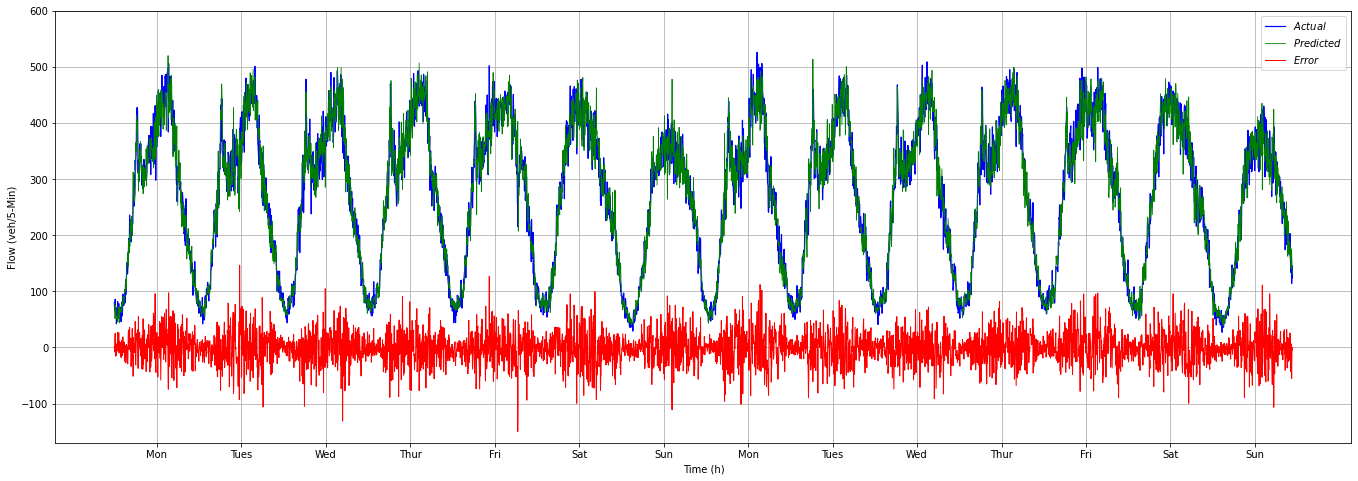

In [48]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv5, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions5, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv5-test_predictions5), lw=1, label=r'$Error$', color='red')

#axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144 + i for i in range(0, 4032, 288)])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']*2)

plt.show()

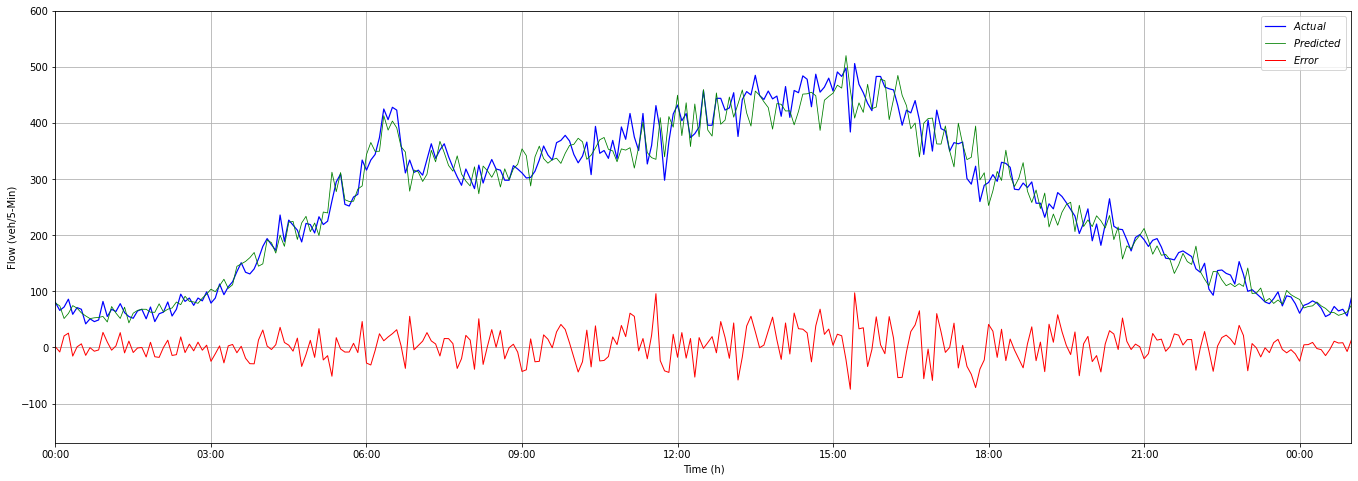

In [49]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv5, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions5, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv5-test_predictions5), lw=1, label=r'$Error$', color='red')

axes.set_xlim(0,300)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

# 15 mins ahead

In [50]:
def build_model_15(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_15.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_15_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt15.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_15 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_15x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_15a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_15b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_15a)
    flatten_15 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_15b)
    # LSTM          
    LSTM_15a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_15)
    LSTM_15b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_15a)
    Att_15 = SeqSelfAttention(attention_activation='tanh')(LSTM_15b)
    Reshaped_15 = keras.layers.Flatten()(Att_15)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_15, Wide_15x, Reshaped_15])
    
    # Output
    output = keras.layers.Dense(1, name= "output")(concat)
    
    # Model
    model_15 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_15.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_15

In [51]:
tuner15 = RandomSearch(
    build_model_15,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=5,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8a-Conv-LSTM-15",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\8a-Conv-LSTM-15\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\8a-Conv-LSTM-15\tuner0.json


In [52]:
tuner15.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [53]:
tuner15.search((Wt15, Wt15x, Xt15), yt15, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop], 
            verbose=2)

INFO:tensorflow:Oracle triggered exit


In [54]:
tuner15.results_summary(1)

Results summary
Results in C:\Runs\8a-Conv-LSTM-15
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 41
wide_day_LSTM: 36
filters: 352
kernel_size: 2
units_LSTM: 42
learning_rate: 0.0001
Score: 0.0020070697646588087


### Best model

In [55]:
best_hp15 = tuner15.get_best_hyperparameters()[0]
model15 = tuner15.hypermodel.build(best_hp15)

In [56]:
scaler_filename = "Best_HP/8a-Conv_LSTM-15"
joblib.dump(best_hp15, scaler_filename) 

['Best_HP/8a-Conv_LSTM-15']

In [57]:
model15.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_9 (TimeDistri  (None, 3, 4, 6, 352  1760       ['deep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_10 (TimeDistr  (None, 3, 3, 5, 352  495968     ['time_distributed_9[0][0]']     
 ibuted)                        )                                                           

In [58]:
#model15.fit((Wt15, Wt15x, Xt15), yt15, 
#            epochs = 100, callbacks=[stop],
#            verbose = 1)

In [59]:
#metrics15 = pd.DataFrame(model15.history.history)

In [60]:
#metrics15[['loss']].plot()

In [61]:
MSE15  = []
MAE15  = []
RMSE15 = []
MAPE15 = []

for i in range(100):
    print(f"run: {i+1}")
    model15.fit((Wt15, Wt15x, Xt15), yt15, 
            epochs = 200, validation_split = val_percent,
            callbacks = [stop],
            verbose = 1)
    
    test_predictions15 = model15.predict((Wv15, Wv15x, Xv15))

    yv15 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
    yv15 = yv15[17:,4]

    df = Test.drop(Test.head(17).index)
    df.reset_index(inplace = True)
    df = df.drop(columns=['index','Timestamp'])
    df['f5'] = pd.Series(test_predictions15.flatten())

    test_predictions15 = scaler.inverse_transform(df)

    test_predictions15 = test_predictions15[:,4]

    MSE15.append(mean_squared_error(yv15,test_predictions15))

    MAE15.append(mean_absolute_error(yv15,test_predictions15))

    RMSE15.append(np.sqrt(mean_squared_error(yv15,test_predictions15)))

    MAPE15.append(mean_absolute_percentage_error(yv15,test_predictions15)*100)


    current_mse = mean_squared_error(yv15,test_predictions15)
    if all(i > current_mse for i in MSE15):
        model15.save("my_dir/8a-Conv-LSTM-15")

eval15 = [mean(MSE15), mean(MAE15), mean(RMSE15), mean(MAPE15)]
std15 = [stdev(MSE15), stdev(MAE15), stdev(RMSE15), stdev(MAPE15)]
print(eval15)

run: 1
Epoch 1/200
846/846 [==============================] - 59s 62ms/step - loss: 0.0101 - mean_absolute_error: 0.0622 - root_mean_squared_error: 0.1007 - mean_absolute_percentage_error: 4382.6743 - val_loss: 0.0026 - val_mean_absolute_error: 0.0389 - val_root_mean_squared_error: 0.0513 - val_mean_absolute_percentage_error: 11.6346
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0025 - mean_absolute_error: 0.0370 - root_mean_squared_error: 0.0498 - mean_absolute_percentage_error: 3573.4055 - val_loss: 0.0029 - val_mean_absolute_error: 0.0420 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 12.7959
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0023 - mean_absolute_error: 0.0358 - root_mean_squared_error: 0.0482 - mean_absolute_percentage_error: 4102.4951 - val_loss: 0.0024 - val_mean_absolute_error: 0.0368 - val_root_mean_squared_error: 0.0488 - val_mean_absolute_percentage_error: 10.9770
Epoch 

846/846 [==============================] - 48s 57ms/step - loss: 0.0019 - mean_absolute_error: 0.0327 - root_mean_squared_error: 0.0440 - mean_absolute_percentage_error: 2814.7529 - val_loss: 0.0020 - val_mean_absolute_error: 0.0336 - val_root_mean_squared_error: 0.0446 - val_mean_absolute_percentage_error: 10.2668
Epoch 6/200
846/846 [==============================] - 49s 57ms/step - loss: 0.0019 - mean_absolute_error: 0.0326 - root_mean_squared_error: 0.0439 - mean_absolute_percentage_error: 3089.0352 - val_loss: 0.0020 - val_mean_absolute_error: 0.0340 - val_root_mean_squared_error: 0.0451 - val_mean_absolute_percentage_error: 10.0713
Epoch 7/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0019 - mean_absolute_error: 0.0326 - root_mean_squared_error: 0.0439 - mean_absolute_percentage_error: 2713.2854 - val_loss: 0.0020 - val_mean_absolute_error: 0.0337 - val_root_mean_squared_error: 0.0448 - val_mean_absolute_percentage_error: 10.1028
Epoch 8/200
846/846 [====

Epoch 8/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - root_mean_squared_error: 0.0423 - mean_absolute_percentage_error: 2697.7136 - val_loss: 0.0021 - val_mean_absolute_error: 0.0345 - val_root_mean_squared_error: 0.0456 - val_mean_absolute_percentage_error: 10.2675
Epoch 9/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - root_mean_squared_error: 0.0421 - mean_absolute_percentage_error: 2696.1340 - val_loss: 0.0021 - val_mean_absolute_error: 0.0345 - val_root_mean_squared_error: 0.0461 - val_mean_absolute_percentage_error: 10.3522
Epoch 10/200
846/846 [==============================] - 49s 57ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - root_mean_squared_error: 0.0421 - mean_absolute_percentage_error: 2768.9802 - val_loss: 0.0020 - val_mean_absolute_error: 0.0341 - val_root_mean_squared_error: 0.0452 - val_mean_absolute_percentage_error: 10.1455
Epoch 11/200

Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0017 - mean_absolute_error: 0.0308 - root_mean_squared_error: 0.0412 - mean_absolute_percentage_error: 2710.4373 - val_loss: 0.0021 - val_mean_absolute_error: 0.0345 - val_root_mean_squared_error: 0.0459 - val_mean_absolute_percentage_error: 10.3108
Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0017 - mean_absolute_error: 0.0307 - root_mean_squared_error: 0.0412 - mean_absolute_percentage_error: 2907.8354 - val_loss: 0.0022 - val_mean_absolute_error: 0.0350 - val_root_mean_squared_error: 0.0468 - val_mean_absolute_percentage_error: 10.5601
Epoch 6/200
846/846 [==============================] - 49s 57ms/step - loss: 0.0017 - mean_absolute_error: 0.0306 - root_mean_squared_error: 0.0409 - mean_absolute_percentage_error: 2557.5300 - val_loss: 0.0022 - val_mean_absolute_error: 0.0351 - val_root_mean_squared_error: 0.0465 - val_mean_absolute_percentage_error: 10.7694
run: 12
Epoch

846/846 [==============================] - 49s 58ms/step - loss: 0.0016 - mean_absolute_error: 0.0297 - root_mean_squared_error: 0.0396 - mean_absolute_percentage_error: 2785.0791 - val_loss: 0.0022 - val_mean_absolute_error: 0.0350 - val_root_mean_squared_error: 0.0466 - val_mean_absolute_percentage_error: 10.4314
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0016 - mean_absolute_error: 0.0295 - root_mean_squared_error: 0.0395 - mean_absolute_percentage_error: 2513.1287 - val_loss: 0.0023 - val_mean_absolute_error: 0.0361 - val_root_mean_squared_error: 0.0481 - val_mean_absolute_percentage_error: 10.5199
Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0016 - mean_absolute_error: 0.0296 - root_mean_squared_error: 0.0395 - mean_absolute_percentage_error: 2826.5759 - val_loss: 0.0022 - val_mean_absolute_error: 0.0352 - val_root_mean_squared_error: 0.0470 - val_mean_absolute_percentage_error: 10.6734
Epoch 4/200
846/846 [====

846/846 [==============================] - 49s 58ms/step - loss: 0.0014 - mean_absolute_error: 0.0283 - root_mean_squared_error: 0.0377 - mean_absolute_percentage_error: 2471.4021 - val_loss: 0.0024 - val_mean_absolute_error: 0.0365 - val_root_mean_squared_error: 0.0490 - val_mean_absolute_percentage_error: 10.7088
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0014 - mean_absolute_error: 0.0281 - root_mean_squared_error: 0.0375 - mean_absolute_percentage_error: 2730.3137 - val_loss: 0.0023 - val_mean_absolute_error: 0.0360 - val_root_mean_squared_error: 0.0482 - val_mean_absolute_percentage_error: 10.7273
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0014 - mean_absolute_error: 0.0280 - root_mean_squared_error: 0.0373 - mean_absolute_percentage_error: 2727.5896 - val_loss: 0.0024 - val_mean_absolute_error: 0.0364 - val_root_mean_squared_error: 0.0488 - val_mean_absolute_percentage_error: 10.8660
Epoch 4/200
846/846 [====

846/846 [==============================] - 49s 58ms/step - loss: 0.0012 - mean_absolute_error: 0.0258 - root_mean_squared_error: 0.0342 - mean_absolute_percentage_error: 2518.4575 - val_loss: 0.0026 - val_mean_absolute_error: 0.0382 - val_root_mean_squared_error: 0.0513 - val_mean_absolute_percentage_error: 11.2346
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0012 - mean_absolute_error: 0.0256 - root_mean_squared_error: 0.0341 - mean_absolute_percentage_error: 2596.0144 - val_loss: 0.0026 - val_mean_absolute_error: 0.0377 - val_root_mean_squared_error: 0.0507 - val_mean_absolute_percentage_error: 11.0626
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0011 - mean_absolute_error: 0.0255 - root_mean_squared_error: 0.0337 - mean_absolute_percentage_error: 2594.5269 - val_loss: 0.0027 - val_mean_absolute_error: 0.0384 - val_root_mean_squared_error: 0.0515 - val_mean_absolute_percentage_error: 11.2432
Epoch 5/200
846/846 [====

Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - root_mean_squared_error: 0.0332 - mean_absolute_percentage_error: 2654.0469 - val_loss: 0.0027 - val_mean_absolute_error: 0.0383 - val_root_mean_squared_error: 0.0516 - val_mean_absolute_percentage_error: 11.1399
Epoch 3/200
846/846 [==============================] - 50s 59ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - root_mean_squared_error: 0.0331 - mean_absolute_percentage_error: 2416.8706 - val_loss: 0.0026 - val_mean_absolute_error: 0.0382 - val_root_mean_squared_error: 0.0512 - val_mean_absolute_percentage_error: 11.0554
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0011 - mean_absolute_error: 0.0249 - root_mean_squared_error: 0.0329 - mean_absolute_percentage_error: 2551.9133 - val_loss: 0.0027 - val_mean_absolute_error: 0.0388 - val_root_mean_squared_error: 0.0523 - val_mean_absolute_percentage_error: 11.3442
Epoch 5/200
8

846/846 [==============================] - 48s 57ms/step - loss: 8.5836e-04 - mean_absolute_error: 0.0222 - root_mean_squared_error: 0.0293 - mean_absolute_percentage_error: 2414.8789 - val_loss: 0.0029 - val_mean_absolute_error: 0.0402 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 11.8005
Epoch 4/200
846/846 [==============================] - 49s 57ms/step - loss: 8.4876e-04 - mean_absolute_error: 0.0221 - root_mean_squared_error: 0.0291 - mean_absolute_percentage_error: 2419.5525 - val_loss: 0.0029 - val_mean_absolute_error: 0.0397 - val_root_mean_squared_error: 0.0534 - val_mean_absolute_percentage_error: 11.6260
Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 8.3167e-04 - mean_absolute_error: 0.0218 - root_mean_squared_error: 0.0288 - mean_absolute_percentage_error: 2434.8530 - val_loss: 0.0028 - val_mean_absolute_error: 0.0395 - val_root_mean_squared_error: 0.0533 - val_mean_absolute_percentage_error: 11.4846
Epoch 6/200
8

846/846 [==============================] - 49s 58ms/step - loss: 6.3737e-04 - mean_absolute_error: 0.0192 - root_mean_squared_error: 0.0252 - mean_absolute_percentage_error: 2324.8225 - val_loss: 0.0031 - val_mean_absolute_error: 0.0415 - val_root_mean_squared_error: 0.0557 - val_mean_absolute_percentage_error: 11.9279
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 6.2543e-04 - mean_absolute_error: 0.0191 - root_mean_squared_error: 0.0250 - mean_absolute_percentage_error: 2466.3567 - val_loss: 0.0031 - val_mean_absolute_error: 0.0414 - val_root_mean_squared_error: 0.0559 - val_mean_absolute_percentage_error: 12.1920
Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 6.0286e-04 - mean_absolute_error: 0.0187 - root_mean_squared_error: 0.0246 - mean_absolute_percentage_error: 2421.0271 - val_loss: 0.0032 - val_mean_absolute_error: 0.0421 - val_root_mean_squared_error: 0.0568 - val_mean_absolute_percentage_error: 12.0919
Epoch 6/200
8

846/846 [==============================] - 49s 57ms/step - loss: 5.0529e-04 - mean_absolute_error: 0.0172 - root_mean_squared_error: 0.0225 - mean_absolute_percentage_error: 2573.5664 - val_loss: 0.0033 - val_mean_absolute_error: 0.0427 - val_root_mean_squared_error: 0.0574 - val_mean_absolute_percentage_error: 12.2872
Epoch 4/200
846/846 [==============================] - 48s 57ms/step - loss: 4.8431e-04 - mean_absolute_error: 0.0169 - root_mean_squared_error: 0.0220 - mean_absolute_percentage_error: 2439.5542 - val_loss: 0.0034 - val_mean_absolute_error: 0.0431 - val_root_mean_squared_error: 0.0581 - val_mean_absolute_percentage_error: 12.2782
Epoch 5/200
846/846 [==============================] - 48s 57ms/step - loss: 4.8303e-04 - mean_absolute_error: 0.0169 - root_mean_squared_error: 0.0220 - mean_absolute_percentage_error: 2306.3889 - val_loss: 0.0034 - val_mean_absolute_error: 0.0432 - val_root_mean_squared_error: 0.0584 - val_mean_absolute_percentage_error: 12.4025
Epoch 6/200
8

846/846 [==============================] - 49s 58ms/step - loss: 3.5105e-04 - mean_absolute_error: 0.0145 - root_mean_squared_error: 0.0187 - mean_absolute_percentage_error: 2327.7971 - val_loss: 0.0036 - val_mean_absolute_error: 0.0444 - val_root_mean_squared_error: 0.0598 - val_mean_absolute_percentage_error: 12.6715
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 3.4976e-04 - mean_absolute_error: 0.0145 - root_mean_squared_error: 0.0187 - mean_absolute_percentage_error: 2333.0444 - val_loss: 0.0035 - val_mean_absolute_error: 0.0441 - val_root_mean_squared_error: 0.0594 - val_mean_absolute_percentage_error: 12.7037
Epoch 5/200
846/846 [==============================] - 48s 57ms/step - loss: 3.4362e-04 - mean_absolute_error: 0.0143 - root_mean_squared_error: 0.0185 - mean_absolute_percentage_error: 2002.8019 - val_loss: 0.0035 - val_mean_absolute_error: 0.0440 - val_root_mean_squared_error: 0.0593 - val_mean_absolute_percentage_error: 12.6798
Epoch 6/200
8

846/846 [==============================] - 49s 57ms/step - loss: 2.5320e-04 - mean_absolute_error: 0.0123 - root_mean_squared_error: 0.0159 - mean_absolute_percentage_error: 2338.6147 - val_loss: 0.0037 - val_mean_absolute_error: 0.0452 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 13.0066
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 2.4718e-04 - mean_absolute_error: 0.0122 - root_mean_squared_error: 0.0157 - mean_absolute_percentage_error: 2199.6501 - val_loss: 0.0037 - val_mean_absolute_error: 0.0455 - val_root_mean_squared_error: 0.0612 - val_mean_absolute_percentage_error: 13.0961
Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 2.4706e-04 - mean_absolute_error: 0.0122 - root_mean_squared_error: 0.0157 - mean_absolute_percentage_error: 2099.0347 - val_loss: 0.0036 - val_mean_absolute_error: 0.0449 - val_root_mean_squared_error: 0.0602 - val_mean_absolute_percentage_error: 12.8635
Epoch 6/200
8

846/846 [==============================] - 48s 57ms/step - loss: 1.8856e-04 - mean_absolute_error: 0.0107 - root_mean_squared_error: 0.0137 - mean_absolute_percentage_error: 2031.3965 - val_loss: 0.0037 - val_mean_absolute_error: 0.0453 - val_root_mean_squared_error: 0.0608 - val_mean_absolute_percentage_error: 13.0247
Epoch 8/200
846/846 [==============================] - 48s 57ms/step - loss: 1.8341e-04 - mean_absolute_error: 0.0105 - root_mean_squared_error: 0.0135 - mean_absolute_percentage_error: 2293.7849 - val_loss: 0.0037 - val_mean_absolute_error: 0.0451 - val_root_mean_squared_error: 0.0606 - val_mean_absolute_percentage_error: 13.0221
Epoch 9/200
846/846 [==============================] - 48s 57ms/step - loss: 1.8632e-04 - mean_absolute_error: 0.0106 - root_mean_squared_error: 0.0136 - mean_absolute_percentage_error: 2100.7095 - val_loss: 0.0037 - val_mean_absolute_error: 0.0453 - val_root_mean_squared_error: 0.0608 - val_mean_absolute_percentage_error: 12.9960
Epoch 10/200


846/846 [==============================] - 49s 58ms/step - loss: 1.5010e-04 - mean_absolute_error: 0.0095 - root_mean_squared_error: 0.0123 - mean_absolute_percentage_error: 2079.0288 - val_loss: 0.0039 - val_mean_absolute_error: 0.0463 - val_root_mean_squared_error: 0.0622 - val_mean_absolute_percentage_error: 13.3875root_mean_squared_e
Epoch 7/200
846/846 [==============================] - 49s 58ms/step - loss: 1.4758e-04 - mean_absolute_error: 0.0094 - root_mean_squared_error: 0.0121 - mean_absolute_percentage_error: 2291.3555 - val_loss: 0.0038 - val_mean_absolute_error: 0.0462 - val_root_mean_squared_error: 0.0617 - val_mean_absolute_percentage_error: 13.3065
Epoch 8/200
846/846 [==============================] - 49s 58ms/step - loss: 1.3960e-04 - mean_absolute_error: 0.0091 - root_mean_squared_error: 0.0118 - mean_absolute_percentage_error: 2208.8962 - val_loss: 0.0038 - val_mean_absolute_error: 0.0459 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_percentage_error: 13

846/846 [==============================] - 50s 59ms/step - loss: 1.0863e-04 - mean_absolute_error: 0.0080 - root_mean_squared_error: 0.0104 - mean_absolute_percentage_error: 1891.2662 - val_loss: 0.0037 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 13.3666
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 1.0909e-04 - mean_absolute_error: 0.0080 - root_mean_squared_error: 0.0104 - mean_absolute_percentage_error: 2020.5176 - val_loss: 0.0037 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0612 - val_mean_absolute_percentage_error: 13.3591
Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 1.0681e-04 - mean_absolute_error: 0.0079 - root_mean_squared_error: 0.0103 - mean_absolute_percentage_error: 1623.8612 - val_loss: 0.0038 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0615 - val_mean_absolute_percentage_error: 13.4480
Epoch 4/200
8

Epoch 12/200
846/846 [==============================] - 49s 58ms/step - loss: 1.0155e-04 - mean_absolute_error: 0.0077 - root_mean_squared_error: 0.0101 - mean_absolute_percentage_error: 1642.9885 - val_loss: 0.0037 - val_mean_absolute_error: 0.0458 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 13.3886
run: 85
Epoch 1/200
846/846 [==============================] - 50s 59ms/step - loss: 1.0540e-04 - mean_absolute_error: 0.0079 - root_mean_squared_error: 0.0103 - mean_absolute_percentage_error: 1767.5995 - val_loss: 0.0038 - val_mean_absolute_error: 0.0462 - val_root_mean_squared_error: 0.0615 - val_mean_absolute_percentage_error: 13.5063
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 9.6846e-05 - mean_absolute_error: 0.0075 - root_mean_squared_error: 0.0098 - mean_absolute_percentage_error: 1653.4010 - val_loss: 0.0037 - val_mean_absolute_error: 0.0454 - val_root_mean_squared_error: 0.0605 - val_mean_absolute_percentage_error: 

846/846 [==============================] - 49s 58ms/step - loss: 8.5175e-05 - mean_absolute_error: 0.0070 - root_mean_squared_error: 0.0092 - mean_absolute_percentage_error: 1480.3998 - val_loss: 0.0037 - val_mean_absolute_error: 0.0456 - val_root_mean_squared_error: 0.0605 - val_mean_absolute_percentage_error: 13.4343
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 8.6324e-05 - mean_absolute_error: 0.0071 - root_mean_squared_error: 0.0093 - mean_absolute_percentage_error: 1796.5685 - val_loss: 0.0038 - val_mean_absolute_error: 0.0462 - val_root_mean_squared_error: 0.0614 - val_mean_absolute_percentage_error: 13.6532
Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 8.4406e-05 - mean_absolute_error: 0.0070 - root_mean_squared_error: 0.0092 - mean_absolute_percentage_error: 2068.3330 - val_loss: 0.0038 - val_mean_absolute_error: 0.0461 - val_root_mean_squared_error: 0.0614 - val_mean_absolute_percentage_error: 13.5373
Epoch 4/200
8

run: 93
Epoch 1/200
846/846 [==============================] - 49s 58ms/step - loss: 8.2718e-05 - mean_absolute_error: 0.0069 - root_mean_squared_error: 0.0091 - mean_absolute_percentage_error: 1840.2614 - val_loss: 0.0038 - val_mean_absolute_error: 0.0462 - val_root_mean_squared_error: 0.0614 - val_mean_absolute_percentage_error: 13.5814
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 7.4808e-05 - mean_absolute_error: 0.0066 - root_mean_squared_error: 0.0086 - mean_absolute_percentage_error: 1816.1241 - val_loss: 0.0037 - val_mean_absolute_error: 0.0455 - val_root_mean_squared_error: 0.0606 - val_mean_absolute_percentage_error: 13.4512
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 8.3484e-05 - mean_absolute_error: 0.0070 - root_mean_squared_error: 0.0091 - mean_absolute_percentage_error: 1574.9667 - val_loss: 0.0036 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_error: 1

846/846 [==============================] - 49s 58ms/step - loss: 7.2374e-05 - mean_absolute_error: 0.0065 - root_mean_squared_error: 0.0085 - mean_absolute_percentage_error: 1683.7368 - val_loss: 0.0036 - val_mean_absolute_error: 0.0452 - val_root_mean_squared_error: 0.0602 - val_mean_absolute_percentage_error: 13.5002
Epoch 4/200
846/846 [==============================] - 50s 59ms/step - loss: 6.5274e-05 - mean_absolute_error: 0.0061 - root_mean_squared_error: 0.0081 - mean_absolute_percentage_error: 1539.4270 - val_loss: 0.0037 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0610 - val_mean_absolute_percentage_error: 13.5999olute_percentage_error: 154
Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 6.7120e-05 - mean_absolute_error: 0.0062 - root_mean_squared_error: 0.0082 - mean_absolute_percentage_error: 1423.3895 - val_loss: 0.0036 - val_mean_absolute_error: 0.0456 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_e

In [62]:
model15 = keras.models.load_model("my_dir/8a-Conv-LSTM-15")

In [63]:
runs = {'MSE': MSE15, 'MAE': MAE15, 'RMSE': RMSE15, 'MAPE': MAPE15}
table15 = pd.DataFrame(data=runs)
table15.to_csv("Results/Runs/8a-Conv-LSTM-15")

In [64]:
pd.read_csv("Results/Runs/8a-Conv-LSTM-15", index_col=0)

,MSE,MAE,RMSE,MAPE
0,617.599591,19.225314,24.851551,8.563171
1,617.349556,19.257121,24.846520,8.640864
2,615.149567,19.126591,24.802209,8.521771
3,624.964838,19.318111,24.999297,8.679795
4,614.043776,19.090384,24.779907,8.473855
...,...,...,...,...
95,1091.153160,25.466092,33.032608,11.098452
96,1089.615684,25.472278,33.009327,11.085088
97,1093.345262,25.500514,33.065772,11.205057
98,1094.709876,25.633857,33.086400,11.322749


### Evaluation on inverse_transform

In [65]:
test_predictions15 = model15.predict((Wv15, Wv15x, Xv15))

yv15 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv15 = yv15[17:,4]

df = Test.drop(Test.head(17).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions15.flatten())

test_predictions15 = scaler.inverse_transform(df)

test_predictions15 = test_predictions15[:,4]

#MSE15 = mean_squared_error(yv15,test_predictions15)

#MAE15 = mean_absolute_error(yv15,test_predictions15)

#RMSE15 = np.sqrt(MSE15)

#MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

#eval15 = [MSE15, MAE15, RMSE15, MAPE15]
#print(eval15)

In [66]:
RA10 = ra.RA_10(np.asarray(yv15), np.asarray(test_predictions15))
RA15 = ra.RA_15(np.asarray(yv15), np.asarray(test_predictions15))
RA20 = ra.RA_20(np.asarray(yv15), np.asarray(test_predictions15))

res15 = [RA10, RA15, RA20]
print(res15)

[55.89041095890411, 73.87297633872977, 85.37982565379826]


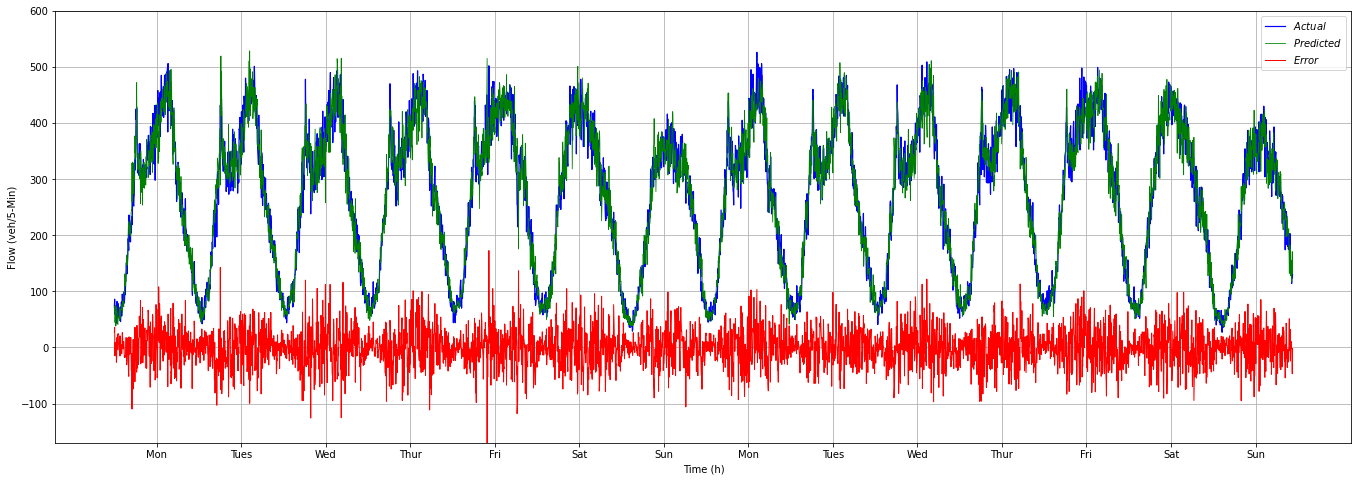

In [67]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv15, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions15, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv15-test_predictions15), lw=1, label=r'$Error$', color='red')

#axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144 + i for i in range(0, 4032, 288)])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']*2)

plt.show()

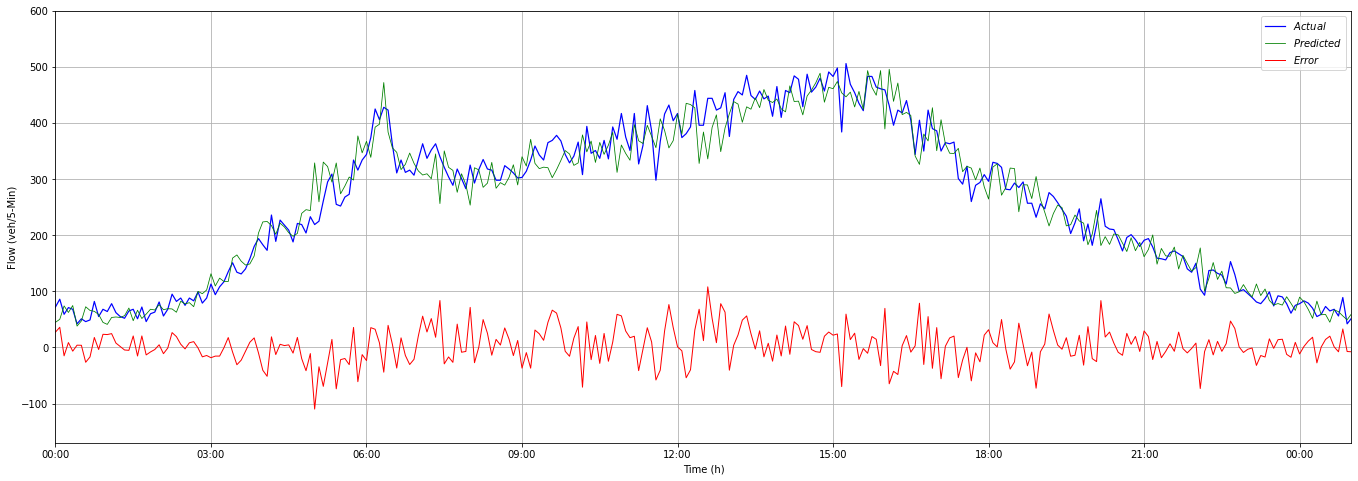

In [68]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv15, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions15, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv15-test_predictions15), lw=1, label=r'$Error$', color='red')

axes.set_xlim(0,300)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

# 30 mins ahead

In [69]:
def build_model_30(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_30.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_30_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt30.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_30 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_30x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_30a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_30b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_30a)
    flatten_30 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_30b)
    # LSTM          
    LSTM_30a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_30)
    LSTM_30b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_30a)
    Att_30 = SeqSelfAttention(attention_activation='tanh')(LSTM_30b)
    Reshaped_30 = keras.layers.Flatten()(Att_30)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_30, Wide_30x, Reshaped_30])
    
    # Output
    output = keras.layers.Dense(1, name= "output")(concat)
    
    # Model
    model_30 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_30.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_30

In [70]:
tuner30 = RandomSearch(
    build_model_30,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=5,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8a-Conv-LSTM-30",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\8a-Conv-LSTM-30\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\8a-Conv-LSTM-30\tuner0.json


In [71]:
tuner30.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [72]:
tuner30.search((Wt30, Wt30x, Xt30), yt30, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

INFO:tensorflow:Oracle triggered exit


In [73]:
tuner30.results_summary(1)

Results summary
Results in C:\Runs\8a-Conv-LSTM-30
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 98
wide_day_LSTM: 39
filters: 352
kernel_size: 2
units_LSTM: 65
learning_rate: 0.0001
Score: 0.002115729032084346


### Best model

In [74]:
best_hp30 = tuner30.get_best_hyperparameters()[0]
model30 = tuner30.hypermodel.build(best_hp30)

In [75]:
scaler_filename = "8a-Conv_LSTM-30"
joblib.dump(best_hp30, scaler_filename) 

['8a-Conv_LSTM-30']

In [76]:
model30.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_15 (TimeDistr  (None, 3, 4, 6, 352  1760       ['deep_input[0][0]']             
 ibuted)                        )                                                                 
                                                                                                  
 time_distributed_16 (TimeDistr  (None, 3, 3, 5, 352  495968     ['time_distributed_15[0][0]']    
 ibuted)                        )                                                           

In [77]:
#model30.fit((Wt30, Wt30x, Xt30), yt30, 
#            epochs = 100, callbacks=[stop],
#            verbose = 1)

In [78]:
#metrics30 = pd.DataFrame(model30.history.history)

In [79]:
#metrics30[['loss']].plot()

In [80]:
MSE30  = []
MAE30  = []
RMSE30 = []
MAPE30 = []

for i in range(100):
    print(f"run: {i+1}")
    model30.fit((Wt30, Wt30x, Xt30), yt30, 
            epochs = 200, validation_split = val_percent,
            callbacks = [stop],
            verbose = 1)
    
    test_predictions30 = model30.predict((Wv30, Wv30x, Xv30))

    yv30 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
    yv30 = yv30[20:,4]

    df = Test.drop(Test.head(20).index)
    df.reset_index(inplace = True)
    df = df.drop(columns=['index','Timestamp'])
    df['f5'] = pd.Series(test_predictions30.flatten())

    test_predictions30 = scaler.inverse_transform(df)

    test_predictions30 = test_predictions30[:,4]

    MSE30.append(mean_squared_error(yv30,test_predictions30))

    MAE30.append(mean_absolute_error(yv30,test_predictions30))

    RMSE30.append(np.sqrt(mean_squared_error(yv30,test_predictions30)))

    MAPE30.append(mean_absolute_percentage_error(yv30,test_predictions30)*100)


    current_mse = mean_squared_error(yv30,test_predictions30)
    if all(i > current_mse for i in MSE30):
        model30.save("my_dir/8a-Conv-LSTM-30")

eval30 = [mean(MSE30), mean(MAE30), mean(RMSE30), mean(MAPE30)]
std30 = [stdev(MSE30), stdev(MAE30), stdev(RMSE30), stdev(MAPE30)]
print(eval30)

run: 1
Epoch 1/200
846/846 [==============================] - 56s 60ms/step - loss: 0.0107 - mean_absolute_error: 0.0653 - root_mean_squared_error: 0.1034 - mean_absolute_percentage_error: 5620.3833 - val_loss: 0.0028 - val_mean_absolute_error: 0.0392 - val_root_mean_squared_error: 0.0530 - val_mean_absolute_percentage_error: 12.3475
Epoch 2/200
846/846 [==============================] - 50s 59ms/step - loss: 0.0027 - mean_absolute_error: 0.0383 - root_mean_squared_error: 0.0517 - mean_absolute_percentage_error: 4470.4067 - val_loss: 0.0026 - val_mean_absolute_error: 0.0377 - val_root_mean_squared_error: 0.0509 - val_mean_absolute_percentage_error: 11.9891
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0025 - mean_absolute_error: 0.0370 - root_mean_squared_error: 0.0503 - mean_absolute_percentage_error: 5229.2310 - val_loss: 0.0026 - val_mean_absolute_error: 0.0379 - val_root_mean_squared_error: 0.0507 - val_mean_absolute_percentage_error: 11.9469
Epoch 

846/846 [==============================] - 49s 58ms/step - loss: 0.0021 - mean_absolute_error: 0.0337 - root_mean_squared_error: 0.0456 - mean_absolute_percentage_error: 3453.4226 - val_loss: 0.0021 - val_mean_absolute_error: 0.0346 - val_root_mean_squared_error: 0.0459 - val_mean_absolute_percentage_error: 10.4316
Epoch 7/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0021 - mean_absolute_error: 0.0336 - root_mean_squared_error: 0.0456 - mean_absolute_percentage_error: 3369.2444 - val_loss: 0.0021 - val_mean_absolute_error: 0.0346 - val_root_mean_squared_error: 0.0460 - val_mean_absolute_percentage_error: 10.5489
Epoch 8/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0021 - mean_absolute_error: 0.0335 - root_mean_squared_error: 0.0454 - mean_absolute_percentage_error: 3266.0891 - val_loss: 0.0022 - val_mean_absolute_error: 0.0352 - val_root_mean_squared_error: 0.0466 - val_mean_absolute_percentage_error: 10.6823
Epoch 9/200
846/846 [====

Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0020 - mean_absolute_error: 0.0332 - root_mean_squared_error: 0.0449 - mean_absolute_percentage_error: 3132.0742 - val_loss: 0.0022 - val_mean_absolute_error: 0.0354 - val_root_mean_squared_error: 0.0467 - val_mean_absolute_percentage_error: 10.9853
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0020 - mean_absolute_error: 0.0332 - root_mean_squared_error: 0.0449 - mean_absolute_percentage_error: 3384.8677 - val_loss: 0.0022 - val_mean_absolute_error: 0.0353 - val_root_mean_squared_error: 0.0466 - val_mean_absolute_percentage_error: 10.4629
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0020 - mean_absolute_error: 0.0330 - root_mean_squared_error: 0.0446 - mean_absolute_percentage_error: 3128.0005 - val_loss: 0.0022 - val_mean_absolute_error: 0.0351 - val_root_mean_squared_error: 0.0465 - val_mean_absolute_percentage_error: 10.5295
Epoch 5/200
8

run: 10
Epoch 1/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0020 - mean_absolute_error: 0.0328 - root_mean_squared_error: 0.0444 - mean_absolute_percentage_error: 3290.6670 - val_loss: 0.0021 - val_mean_absolute_error: 0.0349 - val_root_mean_squared_error: 0.0462 - val_mean_absolute_percentage_error: 10.4249
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0020 - mean_absolute_error: 0.0328 - root_mean_squared_error: 0.0443 - mean_absolute_percentage_error: 3182.1401 - val_loss: 0.0023 - val_mean_absolute_error: 0.0358 - val_root_mean_squared_error: 0.0475 - val_mean_absolute_percentage_error: 10.5288
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0020 - mean_absolute_error: 0.0328 - root_mean_squared_error: 0.0443 - mean_absolute_percentage_error: 3152.4456 - val_loss: 0.0022 - val_mean_absolute_error: 0.0352 - val_root_mean_squared_error: 0.0468 - val_mean_absolute_percentage_error: 10.6261
Epoch

Epoch 6/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0019 - mean_absolute_error: 0.0321 - root_mean_squared_error: 0.0433 - mean_absolute_percentage_error: 3514.2844 - val_loss: 0.0023 - val_mean_absolute_error: 0.0359 - val_root_mean_squared_error: 0.0476 - val_mean_absolute_percentage_error: 10.8927
Epoch 7/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0019 - mean_absolute_error: 0.0321 - root_mean_squared_error: 0.0434 - mean_absolute_percentage_error: 3413.0574 - val_loss: 0.0028 - val_mean_absolute_error: 0.0401 - val_root_mean_squared_error: 0.0526 - val_mean_absolute_percentage_error: 11.2588
Epoch 8/200
846/846 [==============================] - 49s 57ms/step - loss: 0.0019 - mean_absolute_error: 0.0320 - root_mean_squared_error: 0.0432 - mean_absolute_percentage_error: 3299.9810 - val_loss: 0.0022 - val_mean_absolute_error: 0.0359 - val_root_mean_squared_error: 0.0474 - val_mean_absolute_percentage_error: 10.6935
Epoch 9/200
8

Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0018 - mean_absolute_error: 0.0313 - root_mean_squared_error: 0.0423 - mean_absolute_percentage_error: 3274.1472 - val_loss: 0.0023 - val_mean_absolute_error: 0.0366 - val_root_mean_squared_error: 0.0484 - val_mean_absolute_percentage_error: 10.9704
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0018 - mean_absolute_error: 0.0312 - root_mean_squared_error: 0.0420 - mean_absolute_percentage_error: 3453.1064 - val_loss: 0.0023 - val_mean_absolute_error: 0.0361 - val_root_mean_squared_error: 0.0479 - val_mean_absolute_percentage_error: 10.7269
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0018 - mean_absolute_error: 0.0311 - root_mean_squared_error: 0.0419 - mean_absolute_percentage_error: 3739.5305 - val_loss: 0.0024 - val_mean_absolute_error: 0.0370 - val_root_mean_squared_error: 0.0488 - val_mean_absolute_percentage_error: 10.8052
Epoch 5/200
8

Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0015 - mean_absolute_error: 0.0289 - root_mean_squared_error: 0.0388 - mean_absolute_percentage_error: 3525.4841 - val_loss: 0.0026 - val_mean_absolute_error: 0.0382 - val_root_mean_squared_error: 0.0509 - val_mean_absolute_percentage_error: 11.2995
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0015 - mean_absolute_error: 0.0288 - root_mean_squared_error: 0.0386 - mean_absolute_percentage_error: 3641.4121 - val_loss: 0.0028 - val_mean_absolute_error: 0.0399 - val_root_mean_squared_error: 0.0530 - val_mean_absolute_percentage_error: 11.5761
Epoch 5/200
846/846 [==============================] - 49s 57ms/step - loss: 0.0015 - mean_absolute_error: 0.0285 - root_mean_squared_error: 0.0382 - mean_absolute_percentage_error: 3121.4739 - val_loss: 0.0027 - val_mean_absolute_error: 0.0391 - val_root_mean_squared_error: 0.0521 - val_mean_absolute_percentage_error: 11.5749
Epoch 6/200
8

Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0013 - mean_absolute_error: 0.0271 - root_mean_squared_error: 0.0362 - mean_absolute_percentage_error: 3312.4004 - val_loss: 0.0029 - val_mean_absolute_error: 0.0400 - val_root_mean_squared_error: 0.0534 - val_mean_absolute_percentage_error: 11.8746
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0013 - mean_absolute_error: 0.0270 - root_mean_squared_error: 0.0361 - mean_absolute_percentage_error: 3183.5320 - val_loss: 0.0029 - val_mean_absolute_error: 0.0406 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 11.8728
Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0013 - mean_absolute_error: 0.0268 - root_mean_squared_error: 0.0358 - mean_absolute_percentage_error: 3389.4502 - val_loss: 0.0028 - val_mean_absolute_error: 0.0397 - val_root_mean_squared_error: 0.0531 - val_mean_absolute_percentage_error: 11.7281
Epoch 6/200
8

Epoch 6/200
846/846 [==============================] - 50s 59ms/step - loss: 0.0011 - mean_absolute_error: 0.0252 - root_mean_squared_error: 0.0335 - mean_absolute_percentage_error: 3323.7285 - val_loss: 0.0032 - val_mean_absolute_error: 0.0417 - val_root_mean_squared_error: 0.0562 - val_mean_absolute_percentage_error: 12.1723
Epoch 7/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0011 - mean_absolute_error: 0.0251 - root_mean_squared_error: 0.0333 - mean_absolute_percentage_error: 3500.2271 - val_loss: 0.0031 - val_mean_absolute_error: 0.0414 - val_root_mean_squared_error: 0.0555 - val_mean_absolute_percentage_error: 12.0046
run: 29
Epoch 1/200
846/846 [==============================] - 49s 58ms/step - loss: 0.0012 - mean_absolute_error: 0.0257 - root_mean_squared_error: 0.0342 - mean_absolute_percentage_error: 3124.8066 - val_loss: 0.0030 - val_mean_absolute_error: 0.0408 - val_root_mean_squared_error: 0.0547 - val_mean_absolute_percentage_error: 11.8865
Epoch

846/846 [==============================] - 49s 58ms/step - loss: 9.6962e-04 - mean_absolute_error: 0.0236 - root_mean_squared_error: 0.0311 - mean_absolute_percentage_error: 3126.5042 - val_loss: 0.0031 - val_mean_absolute_error: 0.0420 - val_root_mean_squared_error: 0.0560 - val_mean_absolute_percentage_error: 12.0365
Epoch 2/200
846/846 [==============================] - 50s 59ms/step - loss: 9.4499e-04 - mean_absolute_error: 0.0233 - root_mean_squared_error: 0.0307 - mean_absolute_percentage_error: 3204.4211 - val_loss: 0.0031 - val_mean_absolute_error: 0.0413 - val_root_mean_squared_error: 0.0554 - val_mean_absolute_percentage_error: 11.9391
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 9.1744e-04 - mean_absolute_error: 0.0230 - root_mean_squared_error: 0.0303 - mean_absolute_percentage_error: 3298.0320 - val_loss: 0.0032 - val_mean_absolute_error: 0.0424 - val_root_mean_squared_error: 0.0569 - val_mean_absolute_percentage_error: 12.2382
Epoch 4/200
8

846/846 [==============================] - 49s 57ms/step - loss: 6.2841e-04 - mean_absolute_error: 0.0193 - root_mean_squared_error: 0.0251 - mean_absolute_percentage_error: 3003.0244 - val_loss: 0.0037 - val_mean_absolute_error: 0.0450 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_error: 12.9475
run: 43
Epoch 1/200
846/846 [==============================] - 49s 57ms/step - loss: 7.0112e-04 - mean_absolute_error: 0.0203 - root_mean_squared_error: 0.0265 - mean_absolute_percentage_error: 3173.9158 - val_loss: 0.0035 - val_mean_absolute_error: 0.0439 - val_root_mean_squared_error: 0.0588 - val_mean_absolute_percentage_error: 12.5594
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 6.8139e-04 - mean_absolute_error: 0.0200 - root_mean_squared_error: 0.0261 - mean_absolute_percentage_error: 3233.4307 - val_loss: 0.0035 - val_mean_absolute_error: 0.0442 - val_root_mean_squared_error: 0.0588 - val_mean_absolute_percentage_error: 12.6449
Epoch

846/846 [==============================] - 49s 58ms/step - loss: 4.5029e-04 - mean_absolute_error: 0.0165 - root_mean_squared_error: 0.0212 - mean_absolute_percentage_error: 3039.3630 - val_loss: 0.0037 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 12.8476
Epoch 5/200
846/846 [==============================] - 49s 57ms/step - loss: 4.4397e-04 - mean_absolute_error: 0.0164 - root_mean_squared_error: 0.0211 - mean_absolute_percentage_error: 2813.7961 - val_loss: 0.0036 - val_mean_absolute_error: 0.0447 - val_root_mean_squared_error: 0.0597 - val_mean_absolute_percentage_error: 12.7962
Epoch 6/200
846/846 [==============================] - 49s 58ms/step - loss: 4.3187e-04 - mean_absolute_error: 0.0161 - root_mean_squared_error: 0.0208 - mean_absolute_percentage_error: 3018.0945 - val_loss: 0.0037 - val_mean_absolute_error: 0.0454 - val_root_mean_squared_error: 0.0606 - val_mean_absolute_percentage_error: 12.8152
Epoch 7/200
8

Epoch 8/200
846/846 [==============================] - 49s 57ms/step - loss: 3.0966e-04 - mean_absolute_error: 0.0137 - root_mean_squared_error: 0.0176 - mean_absolute_percentage_error: 3303.4846 - val_loss: 0.0038 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_percentage_error: 13.0770
Epoch 9/200
846/846 [==============================] - 48s 57ms/step - loss: 3.0697e-04 - mean_absolute_error: 0.0137 - root_mean_squared_error: 0.0175 - mean_absolute_percentage_error: 3220.6892 - val_loss: 0.0039 - val_mean_absolute_error: 0.0465 - val_root_mean_squared_error: 0.0621 - val_mean_absolute_percentage_error: 13.3374
Epoch 10/200
846/846 [==============================] - 49s 57ms/step - loss: 3.0286e-04 - mean_absolute_error: 0.0136 - root_mean_squared_error: 0.0174 - mean_absolute_percentage_error: 3242.4939 - val_loss: 0.0038 - val_mean_absolute_error: 0.0462 - val_root_mean_squared_error: 0.0615 - val_mean_absolute_percentage_error: 13.0459


846/846 [==============================] - 49s 58ms/step - loss: 1.9489e-04 - mean_absolute_error: 0.0108 - root_mean_squared_error: 0.0140 - mean_absolute_percentage_error: 2786.5706 - val_loss: 0.0038 - val_mean_absolute_error: 0.0464 - val_root_mean_squared_error: 0.0619 - val_mean_absolute_percentage_error: 13.3057
Epoch 12/200
846/846 [==============================] - 49s 58ms/step - loss: 1.9196e-04 - mean_absolute_error: 0.0108 - root_mean_squared_error: 0.0139 - mean_absolute_percentage_error: 2839.6533 - val_loss: 0.0039 - val_mean_absolute_error: 0.0469 - val_root_mean_squared_error: 0.0624 - val_mean_absolute_percentage_error: 13.5591
Epoch 13/200
846/846 [==============================] - 49s 58ms/step - loss: 1.8880e-04 - mean_absolute_error: 0.0107 - root_mean_squared_error: 0.0137 - mean_absolute_percentage_error: 3343.5198 - val_loss: 0.0039 - val_mean_absolute_error: 0.0469 - val_root_mean_squared_error: 0.0628 - val_mean_absolute_percentage_error: 13.4372
Epoch 14/20

846/846 [==============================] - 48s 57ms/step - loss: 1.2914e-04 - mean_absolute_error: 0.0087 - root_mean_squared_error: 0.0114 - mean_absolute_percentage_error: 2920.7346 - val_loss: 0.0038 - val_mean_absolute_error: 0.0464 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_percentage_error: 13.3579
Epoch 21/200
846/846 [==============================] - 48s 57ms/step - loss: 1.2535e-04 - mean_absolute_error: 0.0086 - root_mean_squared_error: 0.0112 - mean_absolute_percentage_error: 2736.6631 - val_loss: 0.0039 - val_mean_absolute_error: 0.0466 - val_root_mean_squared_error: 0.0621 - val_mean_absolute_percentage_error: 13.5666
Epoch 22/200
846/846 [==============================] - 49s 57ms/step - loss: 1.2424e-04 - mean_absolute_error: 0.0085 - root_mean_squared_error: 0.0111 - mean_absolute_percentage_error: 2572.1489 - val_loss: 0.0039 - val_mean_absolute_error: 0.0466 - val_root_mean_squared_error: 0.0622 - val_mean_absolute_percentage_error: 13.4728
Epoch 23/20

846/846 [==============================] - 49s 58ms/step - loss: 1.0561e-04 - mean_absolute_error: 0.0079 - root_mean_squared_error: 0.0103 - mean_absolute_percentage_error: 2122.1819 - val_loss: 0.0039 - val_mean_absolute_error: 0.0467 - val_root_mean_squared_error: 0.0621 - val_mean_absolute_percentage_error: 13.6738
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 1.0552e-04 - mean_absolute_error: 0.0079 - root_mean_squared_error: 0.0103 - mean_absolute_percentage_error: 1994.7997 - val_loss: 0.0038 - val_mean_absolute_error: 0.0464 - val_root_mean_squared_error: 0.0618 - val_mean_absolute_percentage_error: 13.4762
Epoch 3/200
846/846 [==============================] - 49s 58ms/step - loss: 1.0618e-04 - mean_absolute_error: 0.0079 - root_mean_squared_error: 0.0103 - mean_absolute_percentage_error: 2167.9473 - val_loss: 0.0038 - val_mean_absolute_error: 0.0465 - val_root_mean_squared_error: 0.0620 - val_mean_absolute_percentage_error: 13.5284
Epoch 4/200
8

Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 9.7202e-05 - mean_absolute_error: 0.0075 - root_mean_squared_error: 0.0099 - mean_absolute_percentage_error: 1813.9160 - val_loss: 0.0038 - val_mean_absolute_error: 0.0463 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_percentage_error: 13.7370
Epoch 3/200
846/846 [==============================] - 50s 59ms/step - loss: 9.5028e-05 - mean_absolute_error: 0.0074 - root_mean_squared_error: 0.0097 - mean_absolute_percentage_error: 2015.2417 - val_loss: 0.0038 - val_mean_absolute_error: 0.0466 - val_root_mean_squared_error: 0.0619 - val_mean_absolute_percentage_error: 13.6436
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 9.4455e-05 - mean_absolute_error: 0.0074 - root_mean_squared_error: 0.0097 - mean_absolute_percentage_error: 1772.4802 - val_loss: 0.0038 - val_mean_absolute_error: 0.0465 - val_root_mean_squared_error: 0.0619 - val_mean_absolute_percentage_error: 13.5772
E

846/846 [==============================] - 50s 59ms/step - loss: 7.5248e-05 - mean_absolute_error: 0.0066 - root_mean_squared_error: 0.0087 - mean_absolute_percentage_error: 1619.0726 - val_loss: 0.0038 - val_mean_absolute_error: 0.0465 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_percentage_error: 13.7857
run: 72
Epoch 1/200
846/846 [==============================] - 49s 58ms/step - loss: 8.4920e-05 - mean_absolute_error: 0.0071 - root_mean_squared_error: 0.0092 - mean_absolute_percentage_error: 1140.0160 - val_loss: 0.0038 - val_mean_absolute_error: 0.0461 - val_root_mean_squared_error: 0.0614 - val_mean_absolute_percentage_error: 13.6108
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 8.0568e-05 - mean_absolute_error: 0.0069 - root_mean_squared_error: 0.0090 - mean_absolute_percentage_error: 1522.6876 - val_loss: 0.0037 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0612 - val_mean_absolute_percentage_error: 13.5320
Epoch

Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 6.0984e-05 - mean_absolute_error: 0.0060 - root_mean_squared_error: 0.0078 - mean_absolute_percentage_error: 818.3784 - val_loss: 0.0038 - val_mean_absolute_error: 0.0464 - val_root_mean_squared_error: 0.0614 - val_mean_absolute_percentage_error: 13.7846
Epoch 6/200
846/846 [==============================] - 49s 58ms/step - loss: 6.3148e-05 - mean_absolute_error: 0.0061 - root_mean_squared_error: 0.0079 - mean_absolute_percentage_error: 1402.2323 - val_loss: 0.0037 - val_mean_absolute_error: 0.0459 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 13.6017
Epoch 7/200
846/846 [==============================] - 50s 59ms/step - loss: 6.4486e-05 - mean_absolute_error: 0.0061 - root_mean_squared_error: 0.0080 - mean_absolute_percentage_error: 1285.5704 - val_loss: 0.0037 - val_mean_absolute_error: 0.0459 - val_root_mean_squared_error: 0.0610 - val_mean_absolute_percentage_error: 13.6793
Ep

run: 81
Epoch 1/200
846/846 [==============================] - 48s 57ms/step - loss: 5.8644e-05 - mean_absolute_error: 0.0059 - root_mean_squared_error: 0.0077 - mean_absolute_percentage_error: 802.8504 - val_loss: 0.0037 - val_mean_absolute_error: 0.0461 - val_root_mean_squared_error: 0.0611 - val_mean_absolute_percentage_error: 13.7873
Epoch 2/200
846/846 [==============================] - 48s 57ms/step - loss: 5.6539e-05 - mean_absolute_error: 0.0058 - root_mean_squared_error: 0.0075 - mean_absolute_percentage_error: 939.6131 - val_loss: 0.0037 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 13.7401
Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 5.5546e-05 - mean_absolute_error: 0.0057 - root_mean_squared_error: 0.0075 - mean_absolute_percentage_error: 818.5692 - val_loss: 0.0037 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 13.8

Epoch 10/200
846/846 [==============================] - 49s 57ms/step - loss: 4.6182e-05 - mean_absolute_error: 0.0052 - root_mean_squared_error: 0.0068 - mean_absolute_percentage_error: 794.2723 - val_loss: 0.0037 - val_mean_absolute_error: 0.0459 - val_root_mean_squared_error: 0.0608 - val_mean_absolute_percentage_error: 13.7501
Epoch 11/200
846/846 [==============================] - 49s 58ms/step - loss: 4.6820e-05 - mean_absolute_error: 0.0053 - root_mean_squared_error: 0.0068 - mean_absolute_percentage_error: 1005.9633 - val_loss: 0.0038 - val_mean_absolute_error: 0.0464 - val_root_mean_squared_error: 0.0615 - val_mean_absolute_percentage_error: 13.7634
run: 86
Epoch 1/200
846/846 [==============================] - 49s 58ms/step - loss: 4.9272e-05 - mean_absolute_error: 0.0054 - root_mean_squared_error: 0.0070 - mean_absolute_percentage_error: 852.3865 - val_loss: 0.0037 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0608 - val_mean_absolute_percentage_error: 1

Epoch 2/200
846/846 [==============================] - 49s 57ms/step - loss: 4.4624e-05 - mean_absolute_error: 0.0051 - root_mean_squared_error: 0.0067 - mean_absolute_percentage_error: 666.0844 - val_loss: 0.0037 - val_mean_absolute_error: 0.0461 - val_root_mean_squared_error: 0.0610 - val_mean_absolute_percentage_error: 13.8433
Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 4.5360e-05 - mean_absolute_error: 0.0052 - root_mean_squared_error: 0.0067 - mean_absolute_percentage_error: 935.1671 - val_loss: 0.0037 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0605 - val_mean_absolute_percentage_error: 13.7049
Epoch 4/200
846/846 [==============================] - 49s 57ms/step - loss: 4.3091e-05 - mean_absolute_error: 0.0050 - root_mean_squared_error: 0.0066 - mean_absolute_percentage_error: 732.7180 - val_loss: 0.0036 - val_mean_absolute_error: 0.0455 - val_root_mean_squared_error: 0.0603 - val_mean_absolute_percentage_error: 13.7740
Epoc

Epoch 10/200
846/846 [==============================] - 49s 58ms/step - loss: 4.3749e-05 - mean_absolute_error: 0.0051 - root_mean_squared_error: 0.0066 - mean_absolute_percentage_error: 794.4985 - val_loss: 0.0037 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0605 - val_mean_absolute_percentage_error: 13.7479
Epoch 11/200
846/846 [==============================] - 49s 58ms/step - loss: 3.8227e-05 - mean_absolute_error: 0.0048 - root_mean_squared_error: 0.0062 - mean_absolute_percentage_error: 763.4789 - val_loss: 0.0037 - val_mean_absolute_error: 0.0458 - val_root_mean_squared_error: 0.0606 - val_mean_absolute_percentage_error: 13.7253
Epoch 12/200
846/846 [==============================] - 49s 58ms/step - loss: 3.9350e-05 - mean_absolute_error: 0.0049 - root_mean_squared_error: 0.0063 - mean_absolute_percentage_error: 806.5693 - val_loss: 0.0036 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_error: 13.7091
E

Epoch 6/200
846/846 [==============================] - 49s 57ms/step - loss: 3.6044e-05 - mean_absolute_error: 0.0046 - root_mean_squared_error: 0.0060 - mean_absolute_percentage_error: 427.4590 - val_loss: 0.0037 - val_mean_absolute_error: 0.0456 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_error: 13.7156
Epoch 7/200
846/846 [==============================] - 48s 57ms/step - loss: 3.4708e-05 - mean_absolute_error: 0.0046 - root_mean_squared_error: 0.0059 - mean_absolute_percentage_error: 386.7739 - val_loss: 0.0036 - val_mean_absolute_error: 0.0456 - val_root_mean_squared_error: 0.0603 - val_mean_absolute_percentage_error: 13.7710
Epoch 8/200
846/846 [==============================] - 49s 58ms/step - loss: 3.3131e-05 - mean_absolute_error: 0.0045 - root_mean_squared_error: 0.0058 - mean_absolute_percentage_error: 505.1274 - val_loss: 0.0037 - val_mean_absolute_error: 0.0458 - val_root_mean_squared_error: 0.0607 - val_mean_absolute_percentage_error: 13.8431
Epoc

Epoch 5/200
846/846 [==============================] - 48s 57ms/step - loss: 3.1065e-05 - mean_absolute_error: 0.0043 - root_mean_squared_error: 0.0056 - mean_absolute_percentage_error: 621.6403 - val_loss: 0.0036 - val_mean_absolute_error: 0.0456 - val_root_mean_squared_error: 0.0603 - val_mean_absolute_percentage_error: 13.6747
Epoch 6/200
846/846 [==============================] - 48s 57ms/step - loss: 3.4564e-05 - mean_absolute_error: 0.0046 - root_mean_squared_error: 0.0059 - mean_absolute_percentage_error: 631.9190 - val_loss: 0.0036 - val_mean_absolute_error: 0.0456 - val_root_mean_squared_error: 0.0603 - val_mean_absolute_percentage_error: 13.7465
Epoch 7/200
846/846 [==============================] - 49s 57ms/step - loss: 3.2374e-05 - mean_absolute_error: 0.0044 - root_mean_squared_error: 0.0057 - mean_absolute_percentage_error: 448.1948 - val_loss: 0.0037 - val_mean_absolute_error: 0.0459 - val_root_mean_squared_error: 0.0606 - val_mean_absolute_percentage_error: 13.9140
Epoc

Epoch 4/200
846/846 [==============================] - 48s 57ms/step - loss: 3.3225e-05 - mean_absolute_error: 0.0045 - root_mean_squared_error: 0.0058 - mean_absolute_percentage_error: 288.1219 - val_loss: 0.0036 - val_mean_absolute_error: 0.0452 - val_root_mean_squared_error: 0.0597 - val_mean_absolute_percentage_error: 13.7452
Epoch 5/200
846/846 [==============================] - 48s 57ms/step - loss: 3.1277e-05 - mean_absolute_error: 0.0043 - root_mean_squared_error: 0.0056 - mean_absolute_percentage_error: 615.2880 - val_loss: 0.0036 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_error: 13.7387
Epoch 6/200
846/846 [==============================] - 48s 57ms/step - loss: 3.1629e-05 - mean_absolute_error: 0.0044 - root_mean_squared_error: 0.0056 - mean_absolute_percentage_error: 476.1185 - val_loss: 0.0036 - val_mean_absolute_error: 0.0455 - val_root_mean_squared_error: 0.0600 - val_mean_absolute_percentage_error: 13.7582
Epoc

In [81]:
model30 = keras.models.load_model("my_dir/8a-Conv-LSTM-30")

In [82]:
runs = {'MSE': MSE30, 'MAE': MAE30, 'RMSE': RMSE30, 'MAPE': MAPE30}
table30 = pd.DataFrame(data=runs)
table30.to_csv("Results/Runs/8a-Conv-LSTM-30")

In [83]:
pd.read_csv("Results/Runs/8a-Conv-LSTM-30", index_col=0)

,MSE,MAE,RMSE,MAPE
0,650.992156,19.641498,25.514548,8.701240
1,651.169776,19.615677,25.518028,8.655600
2,637.636025,19.440160,25.251456,8.646065
3,644.750311,19.586876,25.391934,8.760165
4,647.765638,19.637734,25.451240,8.881170
...,...,...,...,...
95,1100.000890,25.443435,33.166261,11.185299
96,1108.748093,25.528458,33.297869,11.250581
97,1106.974365,25.545384,33.271224,11.248620
98,1110.197517,25.605956,33.319627,11.399025


### Evaluation on inverse_transform

In [84]:
test_predictions30 = model30.predict((Wv30, Wv30x, Xv30))

yv30 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv30 = yv30[20:,4]

df = Test.drop(Test.head(20).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions30.flatten())

test_predictions30 = scaler.inverse_transform(df)

test_predictions30 = test_predictions30[:,4]

#MSE30 = mean_squared_error(yv30,test_predictions30)

#MAE30 = mean_absolute_error(yv30,test_predictions30)

#RMSE30 = np.sqrt(MSE30)

#MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

#eval30 = [MSE30, MAE30, RMSE30, MAPE30]
#print(eval30)

In [85]:
RA10 = ra.RA_10(np.asarray(yv30), np.asarray(test_predictions30))
RA15 = ra.RA_15(np.asarray(yv30), np.asarray(test_predictions30))
RA20 = ra.RA_20(np.asarray(yv30), np.asarray(test_predictions30))

res30 = [RA10, RA15, RA20]
print(res30)

[57.47756729810568, 75.3738783649053, 86.93918245264207]


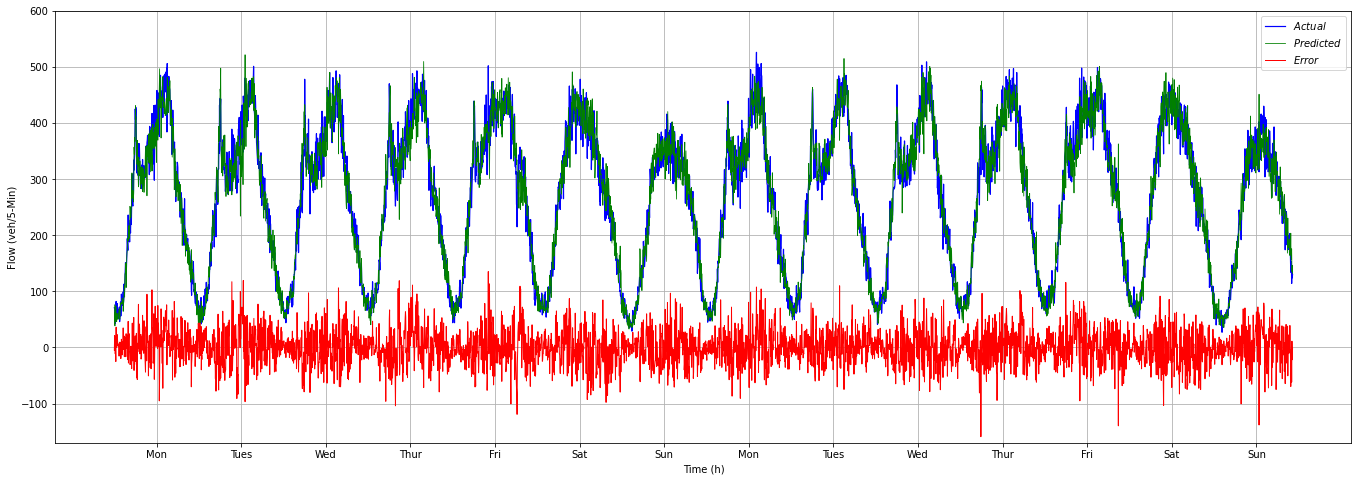

In [86]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv30, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions30, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv30-test_predictions30), lw=1, label=r'$Error$', color='red')

#axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144 + i for i in range(0, 4032, 288)])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']*2)

plt.show()

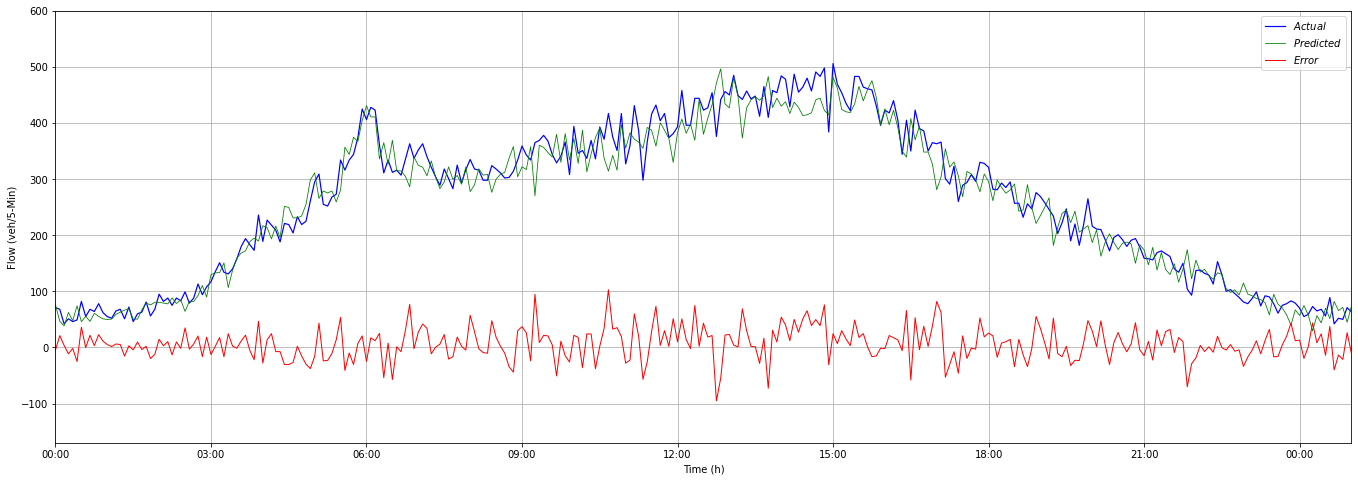

In [87]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv30, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions30, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv30-test_predictions30), lw=1, label=r'$Error$', color='red')

axes.set_xlim(0,300)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

# 60 mins ahead

In [115]:
def build_model_60(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_60.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_60_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt60.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_60 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_60x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_60a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_60b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_60a)
    flatten_60 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_60b)
    # LSTM          
    LSTM_60a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_60)
    LSTM_60b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_60a)
    Att_60 = SeqSelfAttention(attention_activation='tanh')(LSTM_60b)
    Reshaped_60 = keras.layers.Flatten()(Att_60)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_60, Wide_60x, Reshaped_60])
    
    # Output
    output = keras.layers.Dense(1, name= "output")(concat)
    
    # Model
    model_60 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_60.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_60

In [117]:
tuner60 = RandomSearch(
    build_model_60,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=5,
    overwrite=True,
    directory=os.path.normpath('C:/Runs'),
    project_name="8a-Conv-LSTM-60",
)

In [118]:
tuner60.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [119]:
tuner60.search((Wt60, Wt60x, Xt60), yt60, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 30 Complete [00h 31m 03s]
val_loss: 0.0023926584981381893

Best val_loss So Far: 0.0022635323693975806
Total elapsed time: 15h 46m 31s
INFO:tensorflow:Oracle triggered exit


In [120]:
tuner60.results_summary(1)

Results summary
Results in C:\Runs\8a-Conv-LSTM-60
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 59
wide_day_LSTM: 54
filters: 288
kernel_size: 2
units_LSTM: 20
learning_rate: 0.001
Score: 0.0022635323693975806


### Best model

In [121]:
best_hp60 = tuner60.get_best_hyperparameters()[0]
model60 = tuner60.hypermodel.build(best_hp60)

In [122]:
scaler_filename = "Best_HP/8a-Conv_LSTM-60"
joblib.dump(best_hp60, scaler_filename) 

['Best_HP/8a-Conv_LSTM-60']

In [123]:
model60.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 4, 6, 288  1440       ['deep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 3, 5, 288  332064     ['time_distributed_3[0][0]']     
 buted)                         )                                                           

In [124]:
#model60.fit((Wt60, Wt60x, Xt60), yt60, 
#            epochs = 100, callbacks=[stop],
#            verbose = 1
#            )

In [125]:
#metrics60 = pd.DataFrame(model60.history.history)

In [126]:
#metrics60[['loss']].plot()

In [127]:
MSE60  = []
MAE60  = []
RMSE60 = []
MAPE60 = []

for i in range(100):
    print(f"run: {i+1}")
    model60.fit((Wt60, Wt60x, Xt60), yt60, 
            epochs = 200, validation_split = val_percent,
            callbacks = [stop],
            verbose = 1
            )
    
    test_predictions60 = model60.predict((Wv60, Wv60x, Xv60))
    
    yv60 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
    yv60 = yv60[26:,4]

    df = Test.drop(Test.head(26).index)
    df.reset_index(inplace = True)
    df = df.drop(columns=['index','Timestamp'])
    df['f5'] = pd.Series(test_predictions60.flatten())

    test_predictions60 = scaler.inverse_transform(df)

    test_predictions60 = test_predictions60[:,4]
    
    MSE60.append(mean_squared_error(yv60,test_predictions60))

    MAE60.append(mean_absolute_error(yv60,test_predictions60))

    RMSE60.append(np.sqrt(mean_squared_error(yv60,test_predictions60)))

    MAPE60.append(mean_absolute_percentage_error(yv60,test_predictions60)*100)


    current_mse = mean_squared_error(yv60,test_predictions60)
    if all(i > current_mse for i in MSE60):
        model60.save("my_dir/8a-Conv-LSTM-60")

eval60 = [mean(MSE60), mean(MAE60), mean(RMSE60), mean(MAPE60)]
std60 = [stdev(MSE60), stdev(MAE60), stdev(RMSE60), stdev(MAPE60)]
print(eval60)

run: 1
Epoch 1/200
846/846 [==============================] - 54s 58ms/step - loss: 0.0044 - mean_absolute_error: 0.0431 - root_mean_squared_error: 0.0663 - mean_absolute_percentage_error: 3532.1992 - val_loss: 0.0030 - val_mean_absolute_error: 0.0396 - val_root_mean_squared_error: 0.0546 - val_mean_absolute_percentage_error: 11.7071
Epoch 2/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0027 - mean_absolute_error: 0.0378 - root_mean_squared_error: 0.0523 - mean_absolute_percentage_error: 3218.0562 - val_loss: 0.0029 - val_mean_absolute_error: 0.0393 - val_root_mean_squared_error: 0.0539 - val_mean_absolute_percentage_error: 11.4552
Epoch 3/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0027 - mean_absolute_error: 0.0378 - root_mean_squared_error: 0.0522 - mean_absolute_percentage_error: 3314.0581 - val_loss: 0.0028 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0528 - val_mean_absolute_percentage_error: 11.3757
Epoch 

run: 3
Epoch 1/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0024 - mean_absolute_error: 0.0361 - root_mean_squared_error: 0.0493 - mean_absolute_percentage_error: 2961.6133 - val_loss: 0.0027 - val_mean_absolute_error: 0.0389 - val_root_mean_squared_error: 0.0521 - val_mean_absolute_percentage_error: 12.0515
Epoch 2/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0024 - mean_absolute_error: 0.0362 - root_mean_squared_error: 0.0492 - mean_absolute_percentage_error: 2876.0325 - val_loss: 0.0025 - val_mean_absolute_error: 0.0372 - val_root_mean_squared_error: 0.0503 - val_mean_absolute_percentage_error: 10.9768
Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0024 - mean_absolute_error: 0.0360 - root_mean_squared_error: 0.0489 - mean_absolute_percentage_error: 2956.3726 - val_loss: 0.0025 - val_mean_absolute_error: 0.0369 - val_root_mean_squared_error: 0.0500 - val_mean_absolute_percentage_error: 11.1680
Epoch 

Epoch 6/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0023 - mean_absolute_error: 0.0355 - root_mean_squared_error: 0.0482 - mean_absolute_percentage_error: 3368.1401 - val_loss: 0.0026 - val_mean_absolute_error: 0.0373 - val_root_mean_squared_error: 0.0512 - val_mean_absolute_percentage_error: 10.9664
Epoch 7/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0023 - mean_absolute_error: 0.0355 - root_mean_squared_error: 0.0481 - mean_absolute_percentage_error: 3276.4146 - val_loss: 0.0026 - val_mean_absolute_error: 0.0375 - val_root_mean_squared_error: 0.0508 - val_mean_absolute_percentage_error: 10.9801
run: 7
Epoch 1/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0024 - mean_absolute_error: 0.0358 - root_mean_squared_error: 0.0485 - mean_absolute_percentage_error: 3283.3176 - val_loss: 0.0027 - val_mean_absolute_error: 0.0386 - val_root_mean_squared_error: 0.0518 - val_mean_absolute_percentage_error: 11.0423
Epoch 

Epoch 2/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0023 - mean_absolute_error: 0.0353 - root_mean_squared_error: 0.0477 - mean_absolute_percentage_error: 3081.0271 - val_loss: 0.0026 - val_mean_absolute_error: 0.0376 - val_root_mean_squared_error: 0.0510 - val_mean_absolute_percentage_error: 11.5312
Epoch 3/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0023 - mean_absolute_error: 0.0352 - root_mean_squared_error: 0.0475 - mean_absolute_percentage_error: 2640.7903 - val_loss: 0.0028 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0532 - val_mean_absolute_percentage_error: 11.2510
Epoch 4/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0022 - mean_absolute_error: 0.0350 - root_mean_squared_error: 0.0473 - mean_absolute_percentage_error: 3345.2578 - val_loss: 0.0028 - val_mean_absolute_error: 0.0385 - val_root_mean_squared_error: 0.0533 - val_mean_absolute_percentage_error: 11.2848- root_mean_sq

Epoch 7/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0022 - mean_absolute_error: 0.0347 - root_mean_squared_error: 0.0468 - mean_absolute_percentage_error: 3143.3916 - val_loss: 0.0031 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0554 - val_mean_absolute_percentage_error: 11.6298
Epoch 8/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0022 - mean_absolute_error: 0.0346 - root_mean_squared_error: 0.0465 - mean_absolute_percentage_error: 3677.7942 - val_loss: 0.0030 - val_mean_absolute_error: 0.0385 - val_root_mean_squared_error: 0.0545 - val_mean_absolute_percentage_error: 11.4128
Epoch 9/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0022 - mean_absolute_error: 0.0345 - root_mean_squared_error: 0.0465 - mean_absolute_percentage_error: 3576.5017 - val_loss: 0.0030 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0544 - val_mean_absolute_percentage_error: 11.5105
run: 14
Epoch

run: 20
Epoch 1/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0020 - mean_absolute_error: 0.0337 - root_mean_squared_error: 0.0452 - mean_absolute_percentage_error: 3294.9617 - val_loss: 0.0031 - val_mean_absolute_error: 0.0393 - val_root_mean_squared_error: 0.0556 - val_mean_absolute_percentage_error: 11.4705
Epoch 2/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0021 - mean_absolute_error: 0.0338 - root_mean_squared_error: 0.0454 - mean_absolute_percentage_error: 3341.5483 - val_loss: 0.0031 - val_mean_absolute_error: 0.0393 - val_root_mean_squared_error: 0.0552 - val_mean_absolute_percentage_error: 11.3204
Epoch 3/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0020 - mean_absolute_error: 0.0336 - root_mean_squared_error: 0.0452 - mean_absolute_percentage_error: 3085.9189 - val_loss: 0.0029 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 11.8893
Epoch

run: 22
Epoch 1/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0020 - mean_absolute_error: 0.0329 - root_mean_squared_error: 0.0442 - mean_absolute_percentage_error: 3232.4695 - val_loss: 0.0032 - val_mean_absolute_error: 0.0397 - val_root_mean_squared_error: 0.0562 - val_mean_absolute_percentage_error: 11.4776
Epoch 2/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0020 - mean_absolute_error: 0.0329 - root_mean_squared_error: 0.0442 - mean_absolute_percentage_error: 3089.0879 - val_loss: 0.0031 - val_mean_absolute_error: 0.0399 - val_root_mean_squared_error: 0.0553 - val_mean_absolute_percentage_error: 11.5839
Epoch 3/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0019 - mean_absolute_error: 0.0328 - root_mean_squared_error: 0.0441 - mean_absolute_percentage_error: 3160.9819 - val_loss: 0.0032 - val_mean_absolute_error: 0.0396 - val_root_mean_squared_error: 0.0564 - val_mean_absolute_percentage_error: 11.5665
Epoch

Epoch 7/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0018 - mean_absolute_error: 0.0320 - root_mean_squared_error: 0.0429 - mean_absolute_percentage_error: 3016.5254 - val_loss: 0.0033 - val_mean_absolute_error: 0.0403 - val_root_mean_squared_error: 0.0574 - val_mean_absolute_percentage_error: 11.8127
Epoch 8/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0018 - mean_absolute_error: 0.0319 - root_mean_squared_error: 0.0428 - mean_absolute_percentage_error: 2592.1975 - val_loss: 0.0034 - val_mean_absolute_error: 0.0407 - val_root_mean_squared_error: 0.0582 - val_mean_absolute_percentage_error: 11.7029
run: 25
Epoch 1/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0019 - mean_absolute_error: 0.0324 - root_mean_squared_error: 0.0433 - mean_absolute_percentage_error: 2630.2668 - val_loss: 0.0031 - val_mean_absolute_error: 0.0392 - val_root_mean_squared_error: 0.0555 - val_mean_absolute_percentage_error: 11.4987n_squa

run: 27
Epoch 1/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0018 - mean_absolute_error: 0.0315 - root_mean_squared_error: 0.0423 - mean_absolute_percentage_error: 2604.2537 - val_loss: 0.0032 - val_mean_absolute_error: 0.0400 - val_root_mean_squared_error: 0.0567 - val_mean_absolute_percentage_error: 11.9606
Epoch 2/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - root_mean_squared_error: 0.0420 - mean_absolute_percentage_error: 3048.3887 - val_loss: 0.0035 - val_mean_absolute_error: 0.0409 - val_root_mean_squared_error: 0.0590 - val_mean_absolute_percentage_error: 11.7670
Epoch 3/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - root_mean_squared_error: 0.0420 - mean_absolute_percentage_error: 2893.8999 - val_loss: 0.0031 - val_mean_absolute_error: 0.0401 - val_root_mean_squared_error: 0.0556 - val_mean_absolute_percentage_error: 11.8100
Epoch

Epoch 3/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0017 - mean_absolute_error: 0.0310 - root_mean_squared_error: 0.0414 - mean_absolute_percentage_error: 2940.3257 - val_loss: 0.0035 - val_mean_absolute_error: 0.0410 - val_root_mean_squared_error: 0.0591 - val_mean_absolute_percentage_error: 11.8998
Epoch 4/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0017 - mean_absolute_error: 0.0308 - root_mean_squared_error: 0.0413 - mean_absolute_percentage_error: 2953.8533 - val_loss: 0.0031 - val_mean_absolute_error: 0.0399 - val_root_mean_squared_error: 0.0553 - val_mean_absolute_percentage_error: 11.8080
Epoch 5/200
846/846 [==============================] - 48s 57ms/step - loss: 0.0017 - mean_absolute_error: 0.0309 - root_mean_squared_error: 0.0412 - mean_absolute_percentage_error: 2947.2090 - val_loss: 0.0032 - val_mean_absolute_error: 0.0397 - val_root_mean_squared_error: 0.0561 - val_mean_absolute_percentage_error: 11.7405
Epoch 6/200
8

846/846 [==============================] - 47s 56ms/step - loss: 0.0015 - mean_absolute_error: 0.0293 - root_mean_squared_error: 0.0392 - mean_absolute_percentage_error: 2889.4409 - val_loss: 0.0035 - val_mean_absolute_error: 0.0412 - val_root_mean_squared_error: 0.0591 - val_mean_absolute_percentage_error: 12.2135
run: 36
Epoch 1/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0016 - mean_absolute_error: 0.0296 - root_mean_squared_error: 0.0395 - mean_absolute_percentage_error: 2628.4819 - val_loss: 0.0033 - val_mean_absolute_error: 0.0408 - val_root_mean_squared_error: 0.0570 - val_mean_absolute_percentage_error: 12.2288
Epoch 2/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0016 - mean_absolute_error: 0.0297 - root_mean_squared_error: 0.0396 - mean_absolute_percentage_error: 3014.8057 - val_loss: 0.0038 - val_mean_absolute_error: 0.0421 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_percentage_error: 12.3032
Epoch 3/200
846/8

846/846 [==============================] - 47s 55ms/step - loss: 0.0014 - mean_absolute_error: 0.0284 - root_mean_squared_error: 0.0378 - mean_absolute_percentage_error: 3062.4077 - val_loss: 0.0038 - val_mean_absolute_error: 0.0429 - val_root_mean_squared_error: 0.0614 - val_mean_absolute_percentage_error: 12.3369
Epoch 7/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0014 - mean_absolute_error: 0.0285 - root_mean_squared_error: 0.0380 - mean_absolute_percentage_error: 3014.7031 - val_loss: 0.0036 - val_mean_absolute_error: 0.0425 - val_root_mean_squared_error: 0.0601 - val_mean_absolute_percentage_error: 12.1352
Epoch 8/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0014 - mean_absolute_error: 0.0283 - root_mean_squared_error: 0.0378 - mean_absolute_percentage_error: 2986.0344 - val_loss: 0.0035 - val_mean_absolute_error: 0.0423 - val_root_mean_squared_error: 0.0590 - val_mean_absolute_percentage_error: 12.1329
run: 42
Epoch 1/200
846/8

Epoch 15/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0014 - mean_absolute_error: 0.0278 - root_mean_squared_error: 0.0370 - mean_absolute_percentage_error: 3066.2065 - val_loss: 0.0037 - val_mean_absolute_error: 0.0437 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 13.4099
Epoch 16/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0014 - mean_absolute_error: 0.0278 - root_mean_squared_error: 0.0370 - mean_absolute_percentage_error: 2538.7581 - val_loss: 0.0038 - val_mean_absolute_error: 0.0431 - val_root_mean_squared_error: 0.0614 - val_mean_absolute_percentage_error: 12.3804
run: 44
Epoch 1/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0014 - mean_absolute_error: 0.0277 - root_mean_squared_error: 0.0369 - mean_absolute_percentage_error: 2660.0178 - val_loss: 0.0038 - val_mean_absolute_error: 0.0430 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_percentage_error: 12.3300
Epo

Epoch 3/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0013 - mean_absolute_error: 0.0274 - root_mean_squared_error: 0.0364 - mean_absolute_percentage_error: 2956.4456 - val_loss: 0.0037 - val_mean_absolute_error: 0.0428 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 12.6182
Epoch 4/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0013 - mean_absolute_error: 0.0271 - root_mean_squared_error: 0.0361 - mean_absolute_percentage_error: 2792.9717 - val_loss: 0.0040 - val_mean_absolute_error: 0.0437 - val_root_mean_squared_error: 0.0634 - val_mean_absolute_percentage_error: 12.6060
Epoch 5/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0013 - mean_absolute_error: 0.0272 - root_mean_squared_error: 0.0362 - mean_absolute_percentage_error: 2250.2026 - val_loss: 0.0038 - val_mean_absolute_error: 0.0434 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_percentage_error: 12.3678
Epoch 6/200
8

Epoch 2/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0012 - mean_absolute_error: 0.0265 - root_mean_squared_error: 0.0352 - mean_absolute_percentage_error: 2787.3232 - val_loss: 0.0040 - val_mean_absolute_error: 0.0446 - val_root_mean_squared_error: 0.0636 - val_mean_absolute_percentage_error: 12.9182
Epoch 3/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0013 - mean_absolute_error: 0.0267 - root_mean_squared_error: 0.0355 - mean_absolute_percentage_error: 2911.3955 - val_loss: 0.0041 - val_mean_absolute_error: 0.0448 - val_root_mean_squared_error: 0.0644 - val_mean_absolute_percentage_error: 12.6826
Epoch 4/200
846/846 [==============================] - 46s 55ms/step - loss: 0.0012 - mean_absolute_error: 0.0264 - root_mean_squared_error: 0.0351 - mean_absolute_percentage_error: 2604.2402 - val_loss: 0.0038 - val_mean_absolute_error: 0.0437 - val_root_mean_squared_error: 0.0618 - val_mean_absolute_percentage_error: 12.7044
Epoch 5/200
8

Epoch 2/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0012 - mean_absolute_error: 0.0261 - root_mean_squared_error: 0.0347 - mean_absolute_percentage_error: 2577.8433 - val_loss: 0.0040 - val_mean_absolute_error: 0.0443 - val_root_mean_squared_error: 0.0635 - val_mean_absolute_percentage_error: 12.7245
Epoch 3/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0012 - mean_absolute_error: 0.0261 - root_mean_squared_error: 0.0347 - mean_absolute_percentage_error: 2999.9680 - val_loss: 0.0038 - val_mean_absolute_error: 0.0438 - val_root_mean_squared_error: 0.0618 - val_mean_absolute_percentage_error: 12.5768
Epoch 4/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0012 - mean_absolute_error: 0.0262 - root_mean_squared_error: 0.0348 - mean_absolute_percentage_error: 2121.7153 - val_loss: 0.0044 - val_mean_absolute_error: 0.0454 - val_root_mean_squared_error: 0.0663 - val_mean_absolute_percentage_error: 12.9917
Epoch 5/200
8

Epoch 11/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0011 - mean_absolute_error: 0.0255 - root_mean_squared_error: 0.0338 - mean_absolute_percentage_error: 2870.0049 - val_loss: 0.0043 - val_mean_absolute_error: 0.0452 - val_root_mean_squared_error: 0.0653 - val_mean_absolute_percentage_error: 12.8251
Epoch 12/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0011 - mean_absolute_error: 0.0255 - root_mean_squared_error: 0.0339 - mean_absolute_percentage_error: 2593.0798 - val_loss: 0.0041 - val_mean_absolute_error: 0.0452 - val_root_mean_squared_error: 0.0643 - val_mean_absolute_percentage_error: 12.7820
Epoch 13/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0012 - mean_absolute_error: 0.0256 - root_mean_squared_error: 0.0340 - mean_absolute_percentage_error: 2527.8848 - val_loss: 0.0040 - val_mean_absolute_error: 0.0449 - val_root_mean_squared_error: 0.0635 - val_mean_absolute_percentage_error: 12.8450
Epoch 14/2

Epoch 6/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0011 - mean_absolute_error: 0.0253 - root_mean_squared_error: 0.0336 - mean_absolute_percentage_error: 2725.8806 - val_loss: 0.0037 - val_mean_absolute_error: 0.0441 - val_root_mean_squared_error: 0.0611 - val_mean_absolute_percentage_error: 13.0914
Epoch 7/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0012 - mean_absolute_error: 0.0259 - root_mean_squared_error: 0.0346 - mean_absolute_percentage_error: 2823.1621 - val_loss: 0.0042 - val_mean_absolute_error: 0.0445 - val_root_mean_squared_error: 0.0649 - val_mean_absolute_percentage_error: 12.8099
Epoch 8/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0011 - mean_absolute_error: 0.0254 - root_mean_squared_error: 0.0336 - mean_absolute_percentage_error: 2991.7498 - val_loss: 0.0040 - val_mean_absolute_error: 0.0446 - val_root_mean_squared_error: 0.0631 - val_mean_absolute_percentage_error: 13.0427
Epoch 9/200
8

Epoch 4/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - root_mean_squared_error: 0.0331 - mean_absolute_percentage_error: 2796.5842 - val_loss: 0.0040 - val_mean_absolute_error: 0.0444 - val_root_mean_squared_error: 0.0629 - val_mean_absolute_percentage_error: 12.6893
Epoch 5/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0011 - mean_absolute_error: 0.0249 - root_mean_squared_error: 0.0330 - mean_absolute_percentage_error: 2935.6624 - val_loss: 0.0041 - val_mean_absolute_error: 0.0453 - val_root_mean_squared_error: 0.0643 - val_mean_absolute_percentage_error: 12.9237
Epoch 6/200
846/846 [==============================] - 47s 55ms/step - loss: 0.0011 - mean_absolute_error: 0.0248 - root_mean_squared_error: 0.0331 - mean_absolute_percentage_error: 2932.0945 - val_loss: 0.0043 - val_mean_absolute_error: 0.0455 - val_root_mean_squared_error: 0.0654 - val_mean_absolute_percentage_error: 13.0708
Epoch 7/200
8

Epoch 3/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0011 - mean_absolute_error: 0.0246 - root_mean_squared_error: 0.0326 - mean_absolute_percentage_error: 3242.1096 - val_loss: 0.0041 - val_mean_absolute_error: 0.0449 - val_root_mean_squared_error: 0.0641 - val_mean_absolute_percentage_error: 12.7973
Epoch 4/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0011 - mean_absolute_error: 0.0247 - root_mean_squared_error: 0.0328 - mean_absolute_percentage_error: 2557.7324 - val_loss: 0.0042 - val_mean_absolute_error: 0.0459 - val_root_mean_squared_error: 0.0651 - val_mean_absolute_percentage_error: 13.2131
Epoch 5/200
846/846 [==============================] - 48s 56ms/step - loss: 0.0010 - mean_absolute_error: 0.0244 - root_mean_squared_error: 0.0324 - mean_absolute_percentage_error: 2547.6902 - val_loss: 0.0042 - val_mean_absolute_error: 0.0459 - val_root_mean_squared_error: 0.0651 - val_mean_absolute_percentage_error: 13.3712
Epoch 6/200
8

Epoch 12/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0010 - mean_absolute_error: 0.0239 - root_mean_squared_error: 0.0318 - mean_absolute_percentage_error: 2676.2417 - val_loss: 0.0043 - val_mean_absolute_error: 0.0462 - val_root_mean_squared_error: 0.0659 - val_mean_absolute_percentage_error: 13.1678
Epoch 13/200
846/846 [==============================] - 47s 56ms/step - loss: 9.8206e-04 - mean_absolute_error: 0.0237 - root_mean_squared_error: 0.0313 - mean_absolute_percentage_error: 2949.2124 - val_loss: 0.0041 - val_mean_absolute_error: 0.0455 - val_root_mean_squared_error: 0.0637 - val_mean_absolute_percentage_error: 12.9863
Epoch 14/200
846/846 [==============================] - 47s 56ms/step - loss: 0.0010 - mean_absolute_error: 0.0239 - root_mean_squared_error: 0.0316 - mean_absolute_percentage_error: 3182.7737 - val_loss: 0.0042 - val_mean_absolute_error: 0.0459 - val_root_mean_squared_error: 0.0647 - val_mean_absolute_percentage_error: 13.2179
Epoch 

846/846 [==============================] - 48s 57ms/step - loss: 9.6038e-04 - mean_absolute_error: 0.0233 - root_mean_squared_error: 0.0310 - mean_absolute_percentage_error: 3055.6548 - val_loss: 0.0044 - val_mean_absolute_error: 0.0465 - val_root_mean_squared_error: 0.0666 - val_mean_absolute_percentage_error: 13.1854
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 9.7102e-04 - mean_absolute_error: 0.0235 - root_mean_squared_error: 0.0312 - mean_absolute_percentage_error: 3194.1089 - val_loss: 0.0045 - val_mean_absolute_error: 0.0466 - val_root_mean_squared_error: 0.0673 - val_mean_absolute_percentage_error: 13.1626
Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 9.4845e-04 - mean_absolute_error: 0.0232 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 2724.9417 - val_loss: 0.0044 - val_mean_absolute_error: 0.0468 - val_root_mean_squared_error: 0.0663 - val_mean_absolute_percentage_error: 13.3684
Epoch 6/200
8

846/846 [==============================] - 49s 58ms/step - loss: 9.2921e-04 - mean_absolute_error: 0.0229 - root_mean_squared_error: 0.0305 - mean_absolute_percentage_error: 3174.3103 - val_loss: 0.0045 - val_mean_absolute_error: 0.0475 - val_root_mean_squared_error: 0.0673 - val_mean_absolute_percentage_error: 13.3623
Epoch 9/200
846/846 [==============================] - 50s 59ms/step - loss: 9.1265e-04 - mean_absolute_error: 0.0228 - root_mean_squared_error: 0.0302 - mean_absolute_percentage_error: 2889.1028 - val_loss: 0.0046 - val_mean_absolute_error: 0.0471 - val_root_mean_squared_error: 0.0680 - val_mean_absolute_percentage_error: 13.5238
run: 79
Epoch 1/200
846/846 [==============================] - 49s 57ms/step - loss: 9.5087e-04 - mean_absolute_error: 0.0232 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 3214.2034 - val_loss: 0.0046 - val_mean_absolute_error: 0.0477 - val_root_mean_squared_error: 0.0677 - val_mean_absolute_percentage_error: 13.5735
Epoch

run: 83
Epoch 1/200
846/846 [==============================] - 50s 59ms/step - loss: 8.7411e-04 - mean_absolute_error: 0.0223 - root_mean_squared_error: 0.0296 - mean_absolute_percentage_error: 3075.4065 - val_loss: 0.0043 - val_mean_absolute_error: 0.0470 - val_root_mean_squared_error: 0.0659 - val_mean_absolute_percentage_error: 13.3976
Epoch 2/200
846/846 [==============================] - 49s 58ms/step - loss: 8.8030e-04 - mean_absolute_error: 0.0223 - root_mean_squared_error: 0.0297 - mean_absolute_percentage_error: 2970.8047 - val_loss: 0.0045 - val_mean_absolute_error: 0.0472 - val_root_mean_squared_error: 0.0674 - val_mean_absolute_percentage_error: 13.4684
Epoch 3/200
846/846 [==============================] - 50s 59ms/step - loss: 8.7228e-04 - mean_absolute_error: 0.0222 - root_mean_squared_error: 0.0295 - mean_absolute_percentage_error: 2833.1301 - val_loss: 0.0044 - val_mean_absolute_error: 0.0472 - val_root_mean_squared_error: 0.0662 - val_mean_absolute_percentage_error: 1

846/846 [==============================] - 51s 60ms/step - loss: 8.4263e-04 - mean_absolute_error: 0.0218 - root_mean_squared_error: 0.0290 - mean_absolute_percentage_error: 2826.2014 - val_loss: 0.0048 - val_mean_absolute_error: 0.0486 - val_root_mean_squared_error: 0.0693 - val_mean_absolute_percentage_error: 13.6699
Epoch 6/200
846/846 [==============================] - 50s 60ms/step - loss: 8.2996e-04 - mean_absolute_error: 0.0217 - root_mean_squared_error: 0.0288 - mean_absolute_percentage_error: 2912.9531 - val_loss: 0.0046 - val_mean_absolute_error: 0.0476 - val_root_mean_squared_error: 0.0676 - val_mean_absolute_percentage_error: 13.6771
Epoch 7/200
846/846 [==============================] - 51s 60ms/step - loss: 8.3056e-04 - mean_absolute_error: 0.0217 - root_mean_squared_error: 0.0288 - mean_absolute_percentage_error: 3177.5403 - val_loss: 0.0045 - val_mean_absolute_error: 0.0473 - val_root_mean_squared_error: 0.0671 - val_mean_absolute_percentage_error: 13.4645
Epoch 8/200
8

846/846 [==============================] - 49s 58ms/step - loss: 8.0469e-04 - mean_absolute_error: 0.0213 - root_mean_squared_error: 0.0284 - mean_absolute_percentage_error: 2949.1746 - val_loss: 0.0045 - val_mean_absolute_error: 0.0472 - val_root_mean_squared_error: 0.0672 - val_mean_absolute_percentage_error: 13.4038
Epoch 19/200
846/846 [==============================] - 50s 59ms/step - loss: 8.0096e-04 - mean_absolute_error: 0.0212 - root_mean_squared_error: 0.0283 - mean_absolute_percentage_error: 2628.3088 - val_loss: 0.0049 - val_mean_absolute_error: 0.0488 - val_root_mean_squared_error: 0.0699 - val_mean_absolute_percentage_error: 14.1185
Epoch 20/200
846/846 [==============================] - 52s 61ms/step - loss: 8.0884e-04 - mean_absolute_error: 0.0214 - root_mean_squared_error: 0.0284 - mean_absolute_percentage_error: 3088.7988 - val_loss: 0.0046 - val_mean_absolute_error: 0.0482 - val_root_mean_squared_error: 0.0676 - val_mean_absolute_percentage_error: 13.6497
run: 91
Epo

846/846 [==============================] - 50s 59ms/step - loss: 7.6673e-04 - mean_absolute_error: 0.0208 - root_mean_squared_error: 0.0277 - mean_absolute_percentage_error: 2700.5410 - val_loss: 0.0046 - val_mean_absolute_error: 0.0482 - val_root_mean_squared_error: 0.0682 - val_mean_absolute_percentage_error: 13.6387
Epoch 4/200
846/846 [==============================] - 49s 58ms/step - loss: 7.9292e-04 - mean_absolute_error: 0.0212 - root_mean_squared_error: 0.0282 - mean_absolute_percentage_error: 2688.2515 - val_loss: 0.0047 - val_mean_absolute_error: 0.0483 - val_root_mean_squared_error: 0.0686 - val_mean_absolute_percentage_error: 13.7241
Epoch 5/200
846/846 [==============================] - 49s 58ms/step - loss: 7.7545e-04 - mean_absolute_error: 0.0210 - root_mean_squared_error: 0.0278 - mean_absolute_percentage_error: 2799.1799 - val_loss: 0.0047 - val_mean_absolute_error: 0.0483 - val_root_mean_squared_error: 0.0682 - val_mean_absolute_percentage_error: 13.7958
Epoch 6/200
8

In [128]:
model60 = keras.models.load_model("my_dir/8a-Conv-LSTM-60")

In [129]:
runs = {'MSE': MSE60, 'MAE': MAE60, 'RMSE': RMSE60, 'MAPE': MAPE60}
table60 = pd.DataFrame(data=runs)
table60.to_csv("Results/Runs/8a-Conv-LSTM-60")

In [130]:
pd.read_csv("Results/Runs/8a-Conv-LSTM-60", index_col=0)

,MSE,MAE,RMSE,MAPE
0,652.466110,19.720941,25.543416,8.780405
1,716.783028,20.652524,26.772804,9.019553
2,680.239166,20.290173,26.081395,9.264359
3,687.763140,20.127223,26.225239,8.743572
4,674.301437,20.025503,25.967315,8.829200
...,...,...,...,...
95,1216.161740,25.852827,34.873511,10.662010
96,1189.715875,25.569069,34.492258,10.716597
97,1197.641224,25.712791,34.606953,10.687216
98,1192.349433,25.585462,34.530413,10.719001


### Evaluation on inverse_transform

In [131]:
test_predictions60 = model60.predict((Wv60, Wv60x, Xv60))

yv60 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv60 = yv60[26:,4]

df = Test.drop(Test.head(26).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions60.flatten())

test_predictions60 = scaler.inverse_transform(df)

test_predictions60 = test_predictions60[:,4]

#MSE60 = mean_squared_error(yv60,test_predictions60)

#MAE60 = mean_absolute_error(yv60,test_predictions60)

#RMSE60 = np.sqrt(MSE60)

#MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

#eval60 = [MSE60, MAE60, RMSE60, MAPE60]
#print(eval60)

In [132]:
RA10 = ra.RA_10(np.asarray(yv60), np.asarray(test_predictions60))
RA15 = ra.RA_15(np.asarray(yv60), np.asarray(test_predictions60))
RA20 = ra.RA_20(np.asarray(yv60), np.asarray(test_predictions60))

res60 = [RA10, RA15, RA20]
print(res60)

[55.14228657014478, 72.36645032451324, 84.34847728407388]


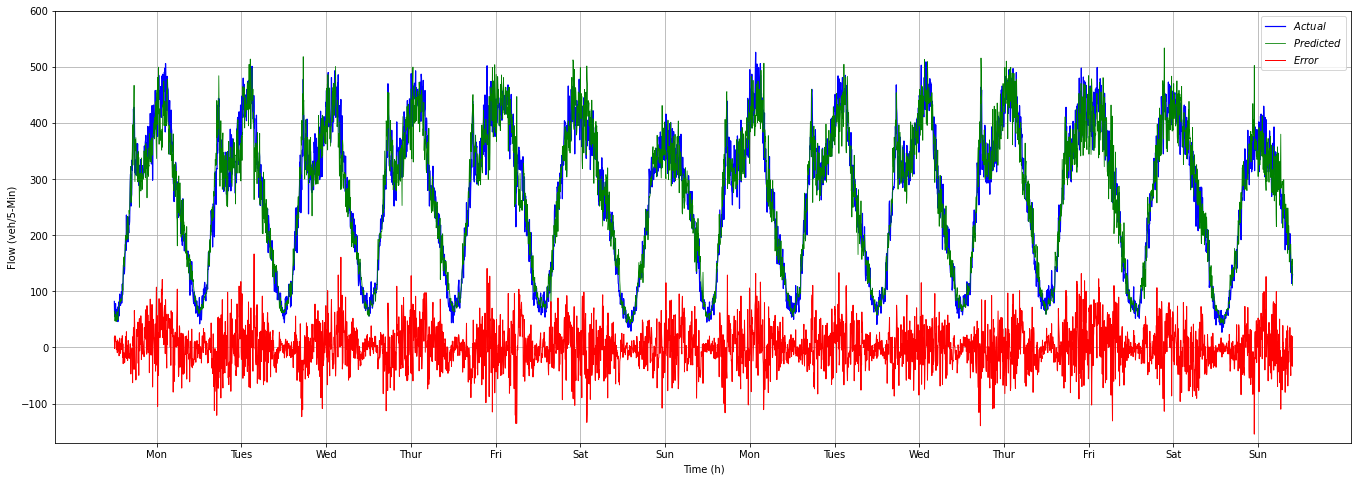

In [133]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv60, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions60, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv60-test_predictions60), lw=1, label=r'$Error$', color='red')

#axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144 + i for i in range(0, 4032, 288)])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']*2)

plt.show()

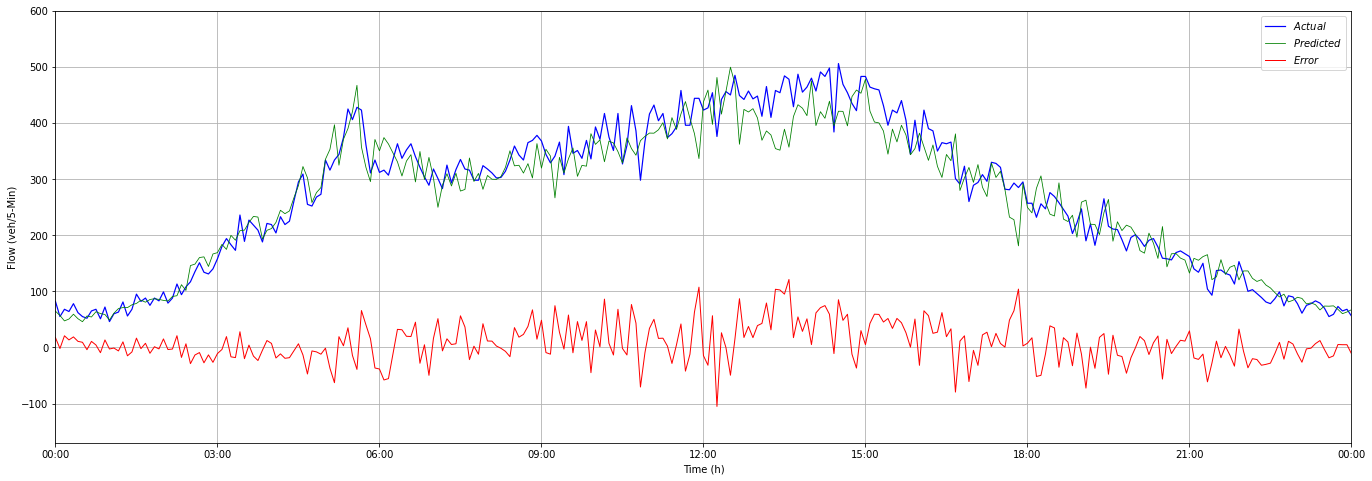

In [134]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv60, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions60, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv60-test_predictions60), lw=1, label=r'$Error$', color='red')

axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

# RESULTS

## General results

In [135]:
l = ['MSE','MAE','RMSE','MAPE','Horizon']

In [147]:
eval5.append(5)
eval15.append(15)
eval30.append(30)
eval60.append(60)

In [148]:
df = pd.DataFrame(np.array([eval5,eval15,eval30,eval60]),columns=l)
df.set_index('Horizon')

,MSE,MAE,RMSE,MAPE
Horizon,,,,
5.0,576.476257,18.071806,23.920587,7.811260
15.0,912.894374,22.983839,30.045765,9.934121
30.0,993.460740,23.905816,31.348749,10.285714
60.0,1054.211427,24.185941,32.444296,11.373528


## Relative accuracy

In [138]:
m = ['10%','15%','20%','Horizon']

In [139]:
res5.append(5)
res15.append(15)
res30.append(30)
res60.append(60)

In [140]:
df1 = pd.DataFrame(np.array([res5,res15,res30,res60]),columns=m)
df1.set_index('Horizon')

,10%,15%,20%
Horizon,,,
5.0,64.052776,81.578292,90.714464
15.0,55.890411,73.872976,85.379826
30.0,57.477567,75.373878,86.939182
60.0,55.142287,72.366450,84.348477


## Save

In [141]:
x = np.array([eval5, eval15, eval30, eval60])
y = np.array([std5, std15, std30, std60])

In [142]:
np.savez("Results/8a", x=x, y=y)